<div align="center"><h1>Project List</h1></div>
<div align="center"><h1>Skin Lesion Classification Use Deep Learning</h1></div>

<div align="center"><h3>Group member</h3></div>
<div align="center"><h3>Hanwen Miao: z5495976  Yuxin Xi: z5563505  Yirou Li: z5563505</h3></div>
<div align="center"><h3>Yi Fan: z5458765  Shuyuan Xing: z5507776</h3></div>

<div align="left"><h1>Introduce</h1></div>


   Skin cancer is one of the most common cancers in the world with a high fatality rate. Early detection and diagnosis are crucial for effective treatment, but the traditional diagnoses of skin lesions are time-consuming and laborious. Therefore, we need to establish an automated classification system for skin lesions to assist doctors in identifying skin cancer, improving accuracy.

<div align="left"><h1>Motivation</h1></div>

This project aims to develop a skin lesion classification model to distinguish skin cancer (such as melanoma) from other types of benign lesions. This project uses the ISIC dataset. To balance the imbalance of categories, we merged similar categories into three categories, including melanoma, nevus, and benign lesions, to balance the label distribution and improve the generalization ability of the model through data augmentation.

<div align="left"><h1>Problem Statemen</h1></div>

In terms of model selection, we used different machine learning and deep learning methods, including SVM, random forest, traditional convolutional neural network (CNN) and ResNet-50 architecture. Experimental results showed that ResNet-50 had the best performance, with an accuracy of nearly 78%. It had high sensitivity and specificity and was much higher than other models.
In this project, we explored the application of deep learning in skin lesion image analysis and effectively improved the classification accuracy.Experimental results showed that deep networks can better capture skin features and provide valuable implementation methods for the medical image classification research.

<div align="left"><h1>Data Sources</h1></div>

This paper works on ISIC Challenge Datasets(https://challenge.isic-archive.com/data/).
      This dataset has 10015 images as training datasets, with a a resolution of 800 x 600 pixels. 193 images as vaildation datasets and 1512 images as testing datasets

There are some samples of the dataset
![image.png](https://objectstorage.ap-sydney-1.oraclecloud.com/n/sdgfztegun7d/b/bucket-20240909-1436/o/example.jpg)
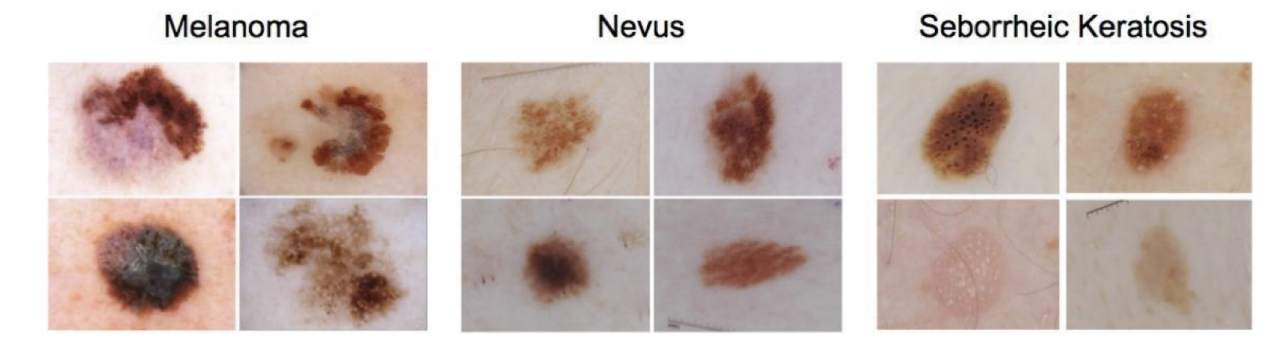

### 1. Dataset Content

- **Images**: Contains a large number of high-resolution images of skin lesions, with each image showing a specific lesion region.

- **Categories**: Dataset involves classification across 7 different types of skin lesions. The specific categories include:
  - **MEL**: Melanoma
  - **NV**: Nevus
  - **BCC**: Basal Cell Carcinoma
  - **AKIEC**: Actinic Keratoses and Intraepithelial Carcinoma (Bowen's disease)
  - **BKL**: Benign Keratosis-like Lesions
  - **DF**: Dermatofibroma
  - **VASC**: Vascular Lesions

- **Label File**: Each image has a corresponding label file that indicates the type of lesion (i.e., the classification label).
### 2. Data Characteristics and Challenges

- **Class Imbalance**: Some categories, such as melanoma and nevus, have a high number of samples, while others, like dermatofibroma, have fewer samples. This imbalance may cause the model to favor predicting more frequent classes, which can impact classification performance.

- **High-Resolution Images**: The images are high-resolution, with rich details, which can create storage and processing challenges.

- **Variability**: Skin lesions exhibit significant variation in color, shape, and texture, adding complexity to the classification task.


<div align="left"><h1>Packets of project</h1></div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import numpy as np
import torchvision.models as models
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tqdm import tqdm
import logging
import warnings

<div align="left"><h1>Exploratory Analysis of Datas</h1></div>

## Details about the properties

In [5]:
# record file path of training, validation, testing dataset.
train_scv = "../skin_lesion/dataset/2018/ISIC2018_Task3_Training_GroundTruth.csv"
val_scv = "../skin_lesion/dataset/2018/ISIC2018_Task3_Validation_GroundTruth.csv"
test_scv = "../skin_lesion/dataset/2018/ISIC2018_Task3_Test_GroundTruth.csv"

### Dataset Overview: Image name and the true label of each image

- **Column Information**:
  - There are 7 labels in the total dataset:
  - **image**: Unique identifier for each image.
  - **MEL**, **NV**, **BCC**, **AKIEC**, **BKL**, **DF**, **VASC**: Each column represents a specific type of skin lesion label (Melanoma, Nevus, Basal Cell Carcinoma, Actinic Keratoses and Intraepithelial Carcinoma, Benign Keratosis-like Lesion, Dermatofibroma, and Vascular Lesion). Each column is a binary label where `1` indicates the presence of the lesion type and `0` indicates its absence.


In [6]:
# Show the training dataset
train_data = pd.read_csv(train_scv)
train_data

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Show the validation dataset
val_data = pd.read_csv(val_scv)
val_data

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0034321,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0034322,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0034323,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ISIC_0034324,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0034325,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
188,ISIC_0034519,0.0,1.0,0.0,0.0,0.0,0.0,0.0
189,ISIC_0034520,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190,ISIC_0034521,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191,ISIC_0034522,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Show the testing dataset
test_data = pd.read_csv(test_scv)
test_data

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0034524,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0034525,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0034526,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ISIC_0034527,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0034528,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1507,ISIC_0036060,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1508,ISIC_0036061,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1509,ISIC_0036062,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1510,ISIC_0036063,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Show the total number of images for each dataset
The bar chart shows the proportion of images in the three datasets (Training, Test, and Validation):

- **Training Set**: 85.45% of the total dataset
- **Test Set**: 12.90% of the total dataset
- **Validation Set**: 1.65% of the total dataset

This indicates that the Training Set has a significantly higher number of images compared to the Test and Validation sets, providing sufficient data for model training. The smaller Validation and Test sets are suitable for evaluating and validating the model.


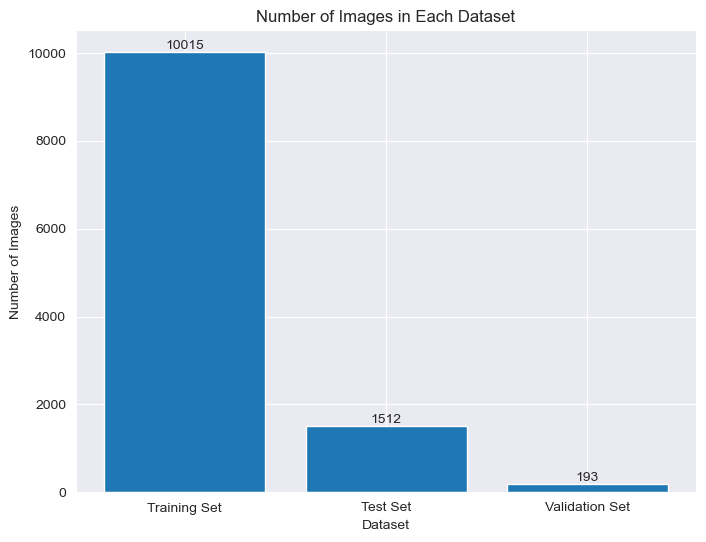

In [51]:
# Count the number of images in each dataset
train_count = len(train_data)
test_count = len(test_data)
validation_count = len(val_data)

# Prepare data for plotting
counts = [train_count, test_count, validation_count]
labels = ['Training Set', 'Test Set', 'Validation Set']

# Plotting the bar chart with counts displayed on top
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts)
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Dataset')

# Adding text on top of each bar to display the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


## Number of classes

Observe the number of 7 labels in the training set, validation set, and test set

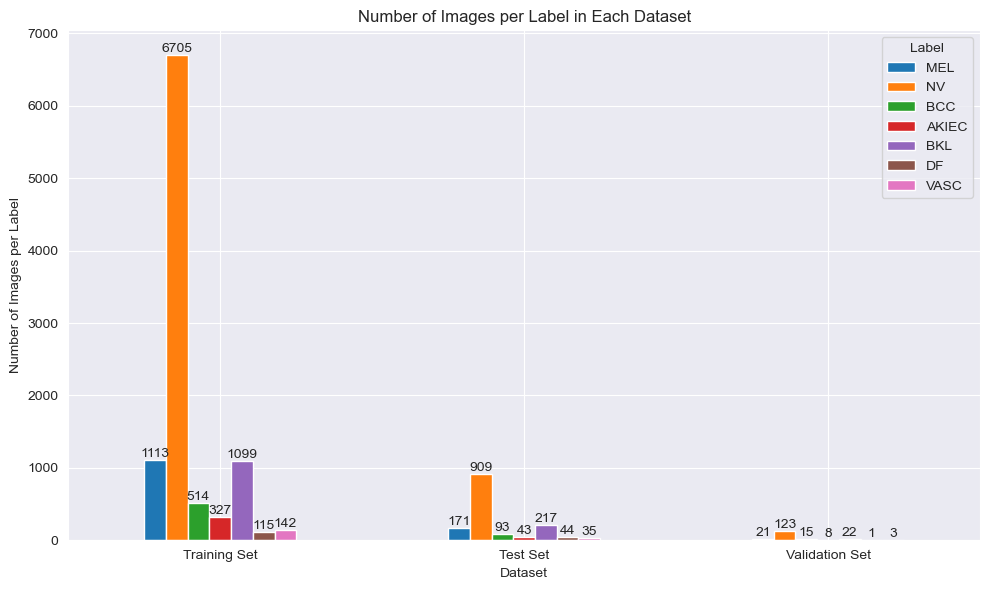

In [52]:
# Calculate the count of each label in the three datasets (train, test, validation)
# Summing each label column to get the total count for each label in each dataset
train_label_counts = train_data.iloc[:, 1:].sum()
test_label_counts = test_data.iloc[:, 1:].sum()
validation_label_counts = val_data.iloc[:, 1:].sum()

# Combine the results into a DataFrame for better comparison
label_counts_df = pd.DataFrame({
    'Training Set': train_label_counts,
    'Test Set': test_label_counts,
    'Validation Set': validation_label_counts
})

# Transpose the DataFrame for plotting with datasets on the x-axis
label_counts_df_transposed = label_counts_df.transpose()

# Plotting the bar chart with datasets on x-axis and labels as groups
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
label_counts_df_transposed.plot(kind="bar", ax=ax)

# Set labels and title
plt.xlabel('Dataset')
plt.ylabel('Number of Images per Label')
plt.title('Number of Images per Label in Each Dataset')
plt.xticks(rotation=0)

# Adding text on top of each bar to display the count
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge")

plt.legend(title="Label")
plt.tight_layout()
plt.show()



### Proportion of Each Label in Each Dataset


| Label | Training Set (%) | Test Set (%) | Validation Set (%) |
|-------|-------------------|--------------|---------------------|
| MEL   | 11.13            | 11.31       | 10.88              |
| NV    | 66.89            | 60.11       | 63.73              |
| BCC   | 5.13             | 6.15        | 7.77               |
| AKIEC | 3.27             | 2.83        | 4.15               |
| BKL   | 10.98            | 14.35       | 11.40              |
| DF    | 1.15             | 2.91        | 0.52               |
| VASC  | 1.42             | 2.31        | 1.55               |


### Analysis

- **MEL and NV**: Proportions are relatively consistent across datasets, indicating that these labels are well-distributed.
- **BCC and AKIEC**: Minor differences between datasets, but overall distributions remain balanced.
- **BKL**: Slightly higher in the Test Set but close in other datasets.
- **DF and VASC**: Noticeable discrepancies, particularly in DF, where the Validation Set proportion is significantly lower, suggesting possible sampling bias.
- **Generally Follows Stratified Sampling**: Overall, the sample proportions for most categories are relatively consistent across the three datasets, especially for MEL and NV, meeting the conditions of stratified sampling.
- **Deviation**: A few categories (such as DF and VASC) show slight differences in proportions across certain datasets, possibly due to small sample sizes or sampling bias. In particular, the DF category has a significantly lower proportion in the Validation Set, which may affect the model's ability to generalize for this category.
- **Imbalanced problem**: The dataset exhibits a significant class imbalance, with the Nevus (NV) category having the highest number of samples, while other categories have relatively fewer samples, especially Dermatofibroma (DF) and Vascular Lesions (VASC). This imbalanced class distribution may lead to poorer predictive performance for the minority categories.

## Challenging aspects

1. **Class Imbalance**
   - **Issue**: There is significant class imbalance in the dataset, with the Nevus (NV) class representing the majority of samples, while other classes, such as Dermatofibroma (DF) and Vascular Lesions (VASC), have relatively few samples.
   - **Challenge**: This imbalance can lead to the model becoming biased toward the majority classes, with insufficient learning on minority classes. Although the model may perform well in terms of overall accuracy, its performance on minority classes might be poor, which can impact real-world applications.

2. **Generalization on Minority Classes**
   - **Issue**: The limited sample size for minority classes (e.g., DF and VASC) makes it challenging for the model to learn distinctive features of these classes, which often leads to misclassification in validation and test phases.
   - **Challenge**: Insufficient data on minority classes not only limits the model's predictive performance but can also lead to overfitting or underfitting for these classes. Due to the limited sample distribution, the model may struggle to generalize on new, unseen minority class samples in real-world scenarios.

3. **Applicability of Data Augmentation**
   - **Issue**: While data augmentation can increase sample diversity, some augmentation techniques (e.g., large rotations, excessive cropping) might distort the critical features of skin lesions.
   - **Challenge**: Selecting appropriate augmentation methods requires caution. Excessive augmentation could blur or distort lesion features, causing the model to learn inaccurate patterns and reducing its effectiveness. Balancing data diversity and preserving lesion characteristics is a crucial difficulty in augmentation.

4. **Lighting and Noise in Real-World Scenarios**
   - **Issue**: Real-world skin lesion images may vary in lighting conditions and contain noise, which might differ from the standardized processing in the dataset.
   - **Challenge**: The model needs to adapt to varying lighting conditions and noise for robust performance in real-world applications. Simulating these variations through data augmentation can improve adaptability, but ensuring the model's robustness under different environmental conditions remains a challenge.

The dataset presents challenges in terms of addressing class imbalance, choosing suitable augmentation techniques, handling real-world lighting and noise, and selecting effective evaluation metrics. By applying tailored sampling strategies, appropriate augmentation techniques, and evaluation metrics, these challenges can be addressed to improve the model’s generalization and performance on minority classes.


## Pre-processing:

### Grouping similar label

### Detailed Explanation of the 7 Skin Lesion Categories

- **MEL - Melanoma**
  - Melanoma is a type of malignant skin cancer originating from melanocytes in the skin. It is one of the most dangerous types of skin cancer, as it easily spreads to other organs. Melanoma typically appears as irregularly shaped and colored patches on the skin.

- **NV - Nevus**
  - Nevus, or common mole, is a benign skin lesion formed by clusters of melanocytes, typically appearing as small brown or black spots. Most moles are harmless, but in some cases, they can develop into melanoma, so monitoring changes is important.

- **BCC - Basal Cell Carcinoma**
  - Basal Cell Carcinoma is the most common type of skin cancer, originating from basal cells in the epidermis. It grows slowly and usually does not spread to other organs, but if left untreated, it can damage surrounding tissues. BCC often appears as a translucent nodule with small blood vessels.

- **AKIEC - Actinic Keratoses and Intraepithelial Carcinoma**
  - Actinic Keratoses are skin lesions caused by prolonged sun exposure and can potentially develop into squamous cell carcinoma (intraepithelial carcinoma). These lesions usually present as rough, scaly patches and are considered precancerous.

- **BKL - Benign Keratosis-like Lesions**
  - Benign Keratosis-like Lesions include various benign skin growths, such as seborrheic keratosis and pigmented keratosis. These lesions typically do not develop into cancer but can be mistaken for other lesions, especially in early stages.

- **DF - Dermatofibroma**
  - Dermatofibroma is a benign skin tumor, often appearing as a small, firm brown or red bump, possibly caused by minor skin injury. DF is usually harmless and does not turn into cancer.

- **VASC - Vascular Lesions**
  - Vascular Lesions are skin lesions related to blood vessels, commonly seen in infants, and may include hemangiomas and venous lakes. While most vascular lesions are benign, some may require treatment to prevent complications or bleeding.


Based on the pathological characteristics of these categories, grouping them into three sets helps simplify classification and reflects actual clinical needs. Below is an analysis of each group:

### Grouping Rationale

- **MEL Group (Malignant Lesions)**: Includes **MEL (Melanoma)**, **BCC (Basal Cell Carcinoma)**, and **AKIEC (Actinic Keratoses and Intraepithelial Carcinoma)**
  - **Analysis**: These lesions have malignant potential and can spread or progress into more severe forms of cancer. Melanoma (MEL) is a highly invasive malignant tumor, while Basal Cell Carcinoma (BCC) and Actinic Keratoses (AKIEC) also carry a risk of malignancy. Grouping these lesions together helps the model distinguish skin lesions with malignant characteristics.

- **NV Group (Nevus-like Lesions)**: Only includes **NV (Nevus)**
  - **Analysis**: Common Nevus (NV) is one of the most prevalent types of benign skin lesions and typically does not develop into malignancy. However, in some cases, it can progress into melanoma. Grouping NV on its own is reasonable due to its unique relationship between benign nature and potential for malignancy, requiring the model to pay special attention.

- **BENIGN Group (Benign Lesions)**: Includes **BKL (Benign Keratosis-like Lesions)**, **DF (Dermatofibroma)**, and **VASC (Vascular Lesions)**
  - **Analysis**: This group contains typically benign lesions without a clear risk of malignancy. Benign Keratosis-like Lesions (BKL), Dermatofibroma (DF), and Vascular Lesions (VASC) generally do not progress into cancer. Grouping them together helps the model distinguish these benign lesions from those with malignant potential.


### Two main methods of pre-processing: Oversampling and Data Augmentation Strategy

In situations where data is imbalanced, minority classes have fewer samples, making it difficult for the model to learn their features, often resulting in a bias toward majority classes. To address this issue, we combine **oversampling** and **data augmentation** strategies, balancing data distribution and diversity, and improving the model's ability to recognize minority classes.

#### 1. Oversampling

Oversampling adjusts the sampling strategy so that the model focuses more on minority classes during training. The specific steps include:

- **Class Weight Calculation**: First, calculate the sample count for each class and determine each class's weight. Minority classes are given higher weights, while majority classes receive lower weights. For example, classes with fewer samples are assigned higher weights, making these samples more likely to be selected during training.

- **Sample Weight Mapping**: Map class weights to each sample, generating a sample weight sequence. Each sample's sampling probability is proportional to the weight of its class. When constructing the DataLoader, the sampler will prioritize minority class samples based on these weights, simulating the effect of oversampling.

- **Effect and Advantages**: This method provides a weight-based oversampling strategy that increases the frequency of minority class samples in training batches, enhancing the model's ability to recognize these classes while avoiding overfitting. Compared to directly duplicating samples, this approach does not increase the dataset's total size, saving storage space.

#### 2. Data Augmentation

Data augmentation applies various transformations to images, allowing the model to see diverse samples within minority classes. Common augmentation techniques include rotation, flipping, cropping, and color adjustments. Here’s a detailed breakdown of each method:

- **Random Horizontal Flip**: Randomly flip images horizontally with a specified probability, changing their orientation. Since skin lesion characteristics remain consistent regardless of direction, flipping can increase image diversity and help the model learn rotational invariance.

- **Random Rotation**: Randomly rotate images within a specified range, such as [-15°, 15°], to simulate different angles. This small rotation range doesn’t affect lesion features but provides varied perspectives, increasing data diversity.

- **Color Jitter**: Randomly adjust brightness, contrast, saturation, and hue to simulate different lighting conditions. This is crucial for skin lesion classification, as lesion color and contrast can vary under different lighting conditions. Color jitter helps the model adapt to these differences.

- **Random Crop**: Randomly crop regions from the image, ensuring the lesion area appears in different parts of the frame, improving the model’s ability to recognize local features. For tasks focused on skin lesions, cropping enhances the model's understanding of localized patterns.

- **Normalization**: Standardize pixel values using the mean and standard deviation to align all images within the same distribution, improving training stability. This step often uses ImageNet’s mean and standard deviation, which has proven effective for generalization.



### Build the dataset class

In [53]:
class SkinLesionDataset(Dataset):
    def __init__(self, ground_truth_csv, img_dir, lesion_groupings_csv=None, transform=None):
        """
        Args:
            ground_truth_csv (string): Path to the CSV file with annotations.
            img_dir (string): Directory with all the images.
            lesion_groupings_csv (string, optional): Path to the CSV file with lesion groupings. Default is None.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.ground_truth_data = pd.read_csv(ground_truth_csv)
        self.img_dir = img_dir
        self.transform = transform
        self.labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

        self.data = self.group_similar_label(ground_truth_csv)
        print(self.data)
        # Use default transform to convert PIL image to tensor if no transform is specified
        if self.transform is None:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),  # Resize image
                transforms.ToTensor(),  # Convert to tensor [C, H, W]: channels, height, width
            ])
            
        # Oversampling method
        self.class_counts = self.data['classes'].value_counts()
        self.class_weights = 1.0 / self.class_counts
        self.sample_weights = self.data['classes'].map(self.class_weights).values

    # function to grouping similar labels
    def group_similar_label(self, ground_truth_csv):
        init_data = pd.read_csv(ground_truth_csv)
        mel_labels = ["MEL", "BCC", "AKIEC"]
        benign_labels = ["BKL", "DF", "VASC"]
        true_class = []
        true_label = []
        for _, rows in init_data.iterrows():
            if any(rows[label] == 1 for label in mel_labels):
                true_class.append("MEL")
                true_label.append([1, 0, 0])
            elif any(rows[label] == 1 for label in benign_labels):
                true_class.append("BENIGN")
                true_label.append([0, 0, 1])
            elif rows["NV"] == 1:
                true_class.append("NV")
                true_label.append([0, 1, 0])
        new_data = pd.DataFrame(init_data["image"])
        new_data = new_data.assign(classes=true_class)
        return new_data.assign(GT=true_label)

    # return the length of dataset
    def __len__(self):
        return len(self.data)

    # Retrieve data sample
    def __getitem__(self, idx):
        # Format conversion
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.data.iloc[idx]['image']

        # Combine image path
        img_path = os.path.join(self.img_dir, img_name + '.jpg')
        # Convert to RGB mode
        image = Image.open(img_path).convert("RGB")

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        # Retrieve the specific disease diagnosis labels
        # Find the corresponding row by image name
        row = self.data[self.data['image'] == img_name].iloc[0]
        # diagnosis_labels = torch.tensor(row[self.labels].values.astype(float))
        # Convert extracted label values to tensor of type float
        diagnosis_labels = torch.tensor(row["GT"], dtype=torch.float32)

        # return image, diagnosis_labels, torch.tensor(is_malignant, dtype=torch.float32)
        # torch.tensor creates a new tensor, which may result in unnecessary memory copies and gradient tracking issues
        return image, diagnosis_labels  # Ensure the tensor returned to the model has no gradient dependency and does not share the same memory space


# Data Augmentation
def get_transforms(is_train=True):
    if is_train:
        # Training phase
        return transforms.Compose([
            transforms.Resize((224, 224)),
            # Randomly flip the image horizontally with a 50% probability to increase image diversity
            transforms.RandomHorizontalFlip(p=0.5),
            # Randomly rotate [-15, 15] degrees to further increase image diversity
            transforms.RandomRotation(degrees=15),
            # Randomly adjust the brightness, contrast, saturation, and hue to simulate variations in lighting conditions
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            # Randomly adjust the image size between [80%, 100%] to increase local diversity of data
            transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),
            # Convert to PyTorch tensor
            transforms.ToTensor(),
            # Normalize the image with predefined mean and standard deviation for more stable training
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        # Validation and testing phase
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])


### Test dataset after oversampling and data augmentation

### Applying Data Augmentation

In [54]:
# load training set
train_dataset = SkinLesionDataset(
        ground_truth_csv=train_scv,
        img_dir=f'../skin_lesion/dataset/2018/ISIC2018_Task3_Training_Input',
        # Applying Data Augmentation
        transform=get_transforms(is_train=True)
    )

# load validation set
val_dataset = SkinLesionDataset(
        ground_truth_csv=val_scv,
        img_dir=f'../skin_lesion/dataset/2018/ISIC2018_Task3_Validation_Input',
        # Applying Data Augmentation
        transform=get_transforms(is_train=True)
    )

# load test set
test_dataset = SkinLesionDataset(
        ground_truth_csv=test_scv,
        img_dir=f'../skin_lesion/dataset/2018/ISIC2018_Task3_Test_Input',
        # Applying Data Augmentation
        transform=get_transforms(is_train=True)
    )

              image classes         GT
0      ISIC_0024306      NV  [0, 1, 0]
1      ISIC_0024307      NV  [0, 1, 0]
2      ISIC_0024308      NV  [0, 1, 0]
3      ISIC_0024309      NV  [0, 1, 0]
4      ISIC_0024310     MEL  [1, 0, 0]
...             ...     ...        ...
10010  ISIC_0034316     MEL  [1, 0, 0]
10011  ISIC_0034317     MEL  [1, 0, 0]
10012  ISIC_0034318  BENIGN  [0, 0, 1]
10013  ISIC_0034319      NV  [0, 1, 0]
10014  ISIC_0034320      NV  [0, 1, 0]

[10015 rows x 3 columns]
            image classes         GT
0    ISIC_0034321      NV  [0, 1, 0]
1    ISIC_0034322      NV  [0, 1, 0]
2    ISIC_0034323     MEL  [1, 0, 0]
3    ISIC_0034324      NV  [0, 1, 0]
4    ISIC_0034325      NV  [0, 1, 0]
..            ...     ...        ...
188  ISIC_0034519      NV  [0, 1, 0]
189  ISIC_0034520      NV  [0, 1, 0]
190  ISIC_0034521  BENIGN  [0, 0, 1]
191  ISIC_0034522      NV  [0, 1, 0]
192  ISIC_0034523     MEL  [1, 0, 0]

[193 rows x 3 columns]
             image classes         GT


### Applying oversampling

In [55]:
# Create a training data loader to handle class imbalance with a weighted sampler
train_sampler = WeightedRandomSampler(train_dataset.sample_weights, len(train_dataset), replacement=True)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler)

# Create a validation data loader to handle class imbalance with a weighted sampler
val_sampler = WeightedRandomSampler(val_dataset.sample_weights, len(val_dataset), replacement=True)
val_loader = DataLoader(val_dataset, batch_size=32, sampler=val_sampler)

# Create a test data loader to handle class imbalance with a weighted sampler
test_sampler = WeightedRandomSampler(test_dataset.sample_weights, len(test_dataset), replacement=True)
test_loader = DataLoader(test_dataset, batch_size=32, sampler=test_sampler)

In [17]:
# function to calculate numbers of label in each dataset
def count_number_label(data_loader):
    # Initialize class counter
    class_count = Counter()

    # Iterate through all batches 
    for images, labels in data_loader:
        # Identify the classes sampled in each batch
        _, sampled_classes = torch.max(labels, 1)  # Get the class of each sample
        class_count.update(sampled_classes.numpy())  # Update the class counter

    # Print the sampled class distribution
    print("Sampled class distribution in each epoch:")
    for class_id, count in sorted(class_count.items()):
        print(f"Class {class_id}: {count} samples")

print("Numbers of labels in training dataset ")
count_number_label(train_loader)
print("Numbers of labels in validation dataset ")
count_number_label(val_loader)
print("Numbers of labels in test dataset ")
count_number_label(test_loader)

Numbers of labels in training dataset 
Sampled class distribution in each epoch:
Class 0: 3301 samples
Class 1: 3356 samples
Class 2: 3358 samples
Numbers of labels in validation dataset 
Sampled class distribution in each epoch:
Class 0: 66 samples
Class 1: 55 samples
Class 2: 72 samples
Numbers of labels in test dataset 
Sampled class distribution in each epoch:
Class 0: 521 samples
Class 1: 518 samples
Class 2: 473 samples


### Display the number of each labels in each dataset

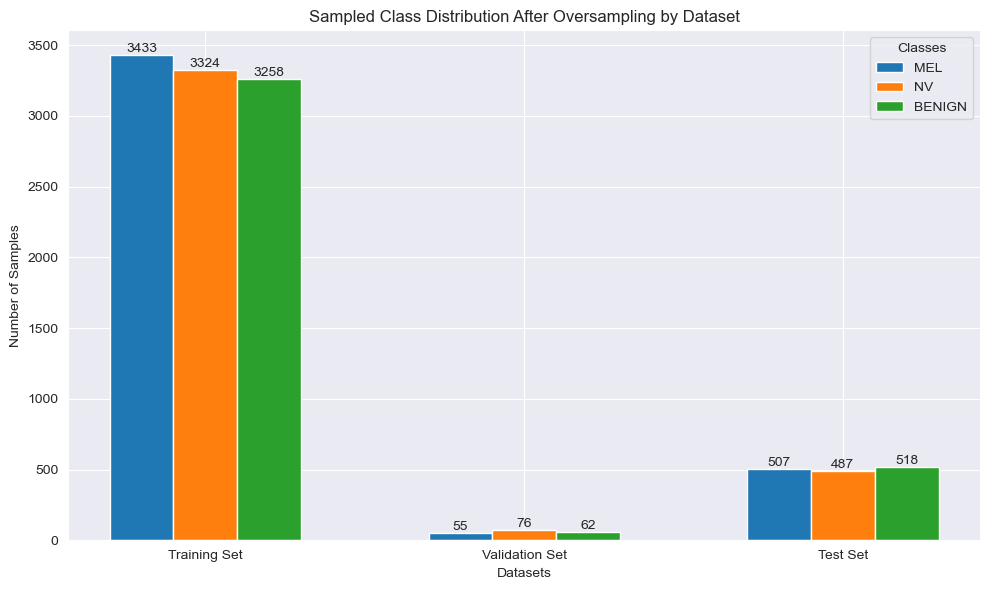

In [56]:
# Adjust data format for x-axis as datasets and class distributions as groups
datasets = ['Training Set', 'Validation Set', 'Test Set']
mel_counts = [3433, 55, 507]
nv_counts = [3324, 76, 487]
benign_counts = [3258, 62, 518]

# X-axis locations for each dataset
x = np.arange(len(datasets))
width = 0.2  # Width of the bars

# Plotting the bar chart with datasets on x-axis and classes as groups
fig, ax = plt.subplots(figsize=(10, 6))
mel_bars = ax.bar(x - width, mel_counts, width, label='MEL')
nv_bars = ax.bar(x, nv_counts, width, label='NV')
benign_bars = ax.bar(x + width, benign_counts, width, label='BENIGN')

# Adding labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Number of Samples')
ax.set_title('Sampled Class Distribution After Oversampling by Dataset')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend(title='Classes')

# Adding text on top of each bar to show counts
for bars in [mel_bars, nv_bars, benign_bars]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Based on the calculated proportions of each category in the different datasets:

- **Training Set**:
  - MEL: 34.28%
  - NV: 33.19%
  - BENIGN: 32.53%
- **Validation Set**:
  - MEL: 28.50%
  - NV: 39.38%
  - BENIGN: 32.12%
- **Test Set**:
  - MEL: 33.53%
  - NV: 32.21%
  - BENIGN: 34.26%

#### Result Analysis
These proportions indicate that in the training, validation, and test datasets, the distributions of the three categories (MEL, NV, and BENIGN) are very close to each other. This reflects the goal of oversampling, which is to balance the sample proportions across categories. This balance facilitates the model's ability to learn each category evenly, reducing bias towards any single category, thereby enhancing the model's generalization ability for minority classes.


### Overall Effect Analysis

The combined strategy of **oversampling** and **data augmentation** offers significant advantages in training:

- **Increased Sampling Frequency of Minority Classes**: Oversampling ensures minority class samples appear more frequently during training, reducing the model’s tendency to rely excessively on majority classes.
  
- **Enhanced Diversity of Minority Class Samples**: Data augmentation enriches the sample space for minority classes by applying various transformations, helping the model generalize better without overfitting.

- **Mitigating the Impact of Imbalanced Data**: By increasing the sample size and diversity for minority classes, this strategy enhances model performance on minority classes, mitigating the bias from imbalanced data.

In summary, combining oversampling and data augmentation effectively addresses class imbalance, allowing the model to learn a more balanced representation of features across different classes and improve predictive accuracy for minority classes.


# Methods and models

## Evaluation matrix

1. **Confusion Matrix**: A commonly used tool for evaluating the performance of classification models, especially in binary and multi-class classification tasks. It provides an intuitive representation of the relationship between the model's predicted results and the actual classes in matrix form, helping to better understand the types of errors made by the model and its performance metrics.
- Definition of Confusion Matrix
For a binary classification problem, a confusion matrix is typically a 2x2 matrix containing the following four elements:

|                | Actual Positive | Actual Negative |
| -------------- | --------------- | --------------- |
| Predicted Positive | True Positive (TP) | False Positive (FP) |
| Predicted Negative | False Negative (FN) | True Negative (TN) |

Each element is defined as follows:
- **True Positive (TP)**: The number of positive samples that the model correctly predicts as positive.
- **False Positive (FP)**: The number of negative samples that the model incorrectly predicts as positive (also known as false alarm).
- **False Negative (FN)**: The number of positive samples that the model incorrectly predicts as negative (miss).
- **True Negative (TN)**: The number of negative samples that the model correctly predicts as negative.

2. **Specificity**: An important metric for evaluating the performance of binary classification models. Specificity represents the model's ability to correctly identify negative samples, i.e., the proportion of true negative instances among all negative predictions.

The formula for specificity is:

$$
\text{Specificity} = \frac{TN}{FP + TN}
$$

Where:
- **TN (True Negative)**: The number of negative samples that the model correctly predicts.
- **FP (False Positive)**: The number of positive samples that the model incorrectly predicts as negative.

Specificity reflects the model's ability to avoid false positives. A higher specificity indicates a stronger ability of the model to distinguish negative samples.

3. **Accuracy**: One of the most commonly used evaluation metrics in classification models, used to measure the overall correctness of the model's predictions. It represents the proportion of correctly predicted samples to the total number of samples.

Accuracy can be defined as the ratio of the number of correctly predicted samples (including both positive and negative classes) to the total number of samples.

The formula for accuracy is:

$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$

Where:
- **TP (True Positive)**: The number of positive samples that the model correctly predicts as positive.
- **TN (True Negative)**: The number of negative samples that the model correctly predicts as negative.
- **FP (False Positive)**: The number of negative samples that the model incorrectly predicts as positive (false positive).
- **FN (False Negative)**: The number of positive samples that the model incorrectly predicts as negative (false negative).

4. **Sensitivity**: An important metric in classification models for measuring the model's ability to identify positive samples. Sensitivity represents the proportion of actual positive samples that are correctly identified by the model.

Sensitivity can be defined as the ratio of the number of correctly predicted positive samples (**TP**, True Positive) to the total number of actual positive samples.

The formula for sensitivity is:

$$
\text{Sensitivity} = \frac{TP}{TP + FN}
$$

Where:
- **TP (True Positive)**: The number of positive samples that the model correctly predicts as positive.
- **FN (False Negative)**: The number of positive samples that the model incorrectly predicts as negative (i.e., missed positive samples).



## Machine Learning Method 

In [57]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import os

def extract_basic_features(image_path):
    """
    Extracts basic features from an image:
    1. Color features (RGB mean values)
    2. Texture features (GLCM contrast and homogeneity)
    3. Shape features (edge density)
    """
    img = cv2.imread(image_path)

    features = []  # feature list

    # 1. Color features (mean values of RGB channels)
    # Split the image into R, G, and B channels and compute the mean value for each channel
    for channel in cv2.split(img):
        features.append(np.mean(channel))

    # 2. Texture features (GLCM)
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute the gray level co-occurrence matrix (GLCM)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    # Extract the contrast property from the GLCM, representing intensity contrast
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    # Extract the homogeneity property from the GLCM, representing the uniformity of pixel pairs
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    features.extend([contrast, homogeneity])  # Add texture features to the feature list

    # 3. Shape features (edge density)
    # Apply Canny edge detection to detect edges in the image
    edges = cv2.Canny(gray, 100, 200)
    # Calculate edge density, which is the mean value of the edge pixels, describing shape complexity
    edge_density = np.mean(edges)
    features.append(edge_density)

    return np.array(features)  # features as a NumPy array


A test output as below `[118.454056, 117.623078, 214.742830, 10.367475, 0.401977, 1.266500]`, represents the extracted features from an input image using our extract_basic_features function, which computes color, texture, and shape features.

In [58]:
dataset_dir=f'../skin_lesion/dataset/2018/'
first_image_name = train_data['image'].iloc[0]
image_path = os.path.join(dataset_dir,'ISIC2018_Task3_Training_Input', first_image_name + '.jpg')
features = extract_basic_features(image_path)
features

array([118.45405556, 117.62307778, 214.74282963,  10.36747542,
         0.40197735,   1.2665    ])

### Dataset Preparation and Feature Extraction

The function and its implementation below used for extracting features of each photo, classify them to 3 classes, label use one-hot encoding, return feature list and a new DataFrame of photos and their corresponding class.

In [59]:
def prepare_dataset(df, subset='Training'):
    """
    Prepares the dataset by extracting features from images and mapping labels into categories.
    """
    features = []  # feature list
    labels = []  # corresponding label list

    print(f"Processing subset: {subset}")
    total = len(df)

    for idx, row in df.iterrows():
        if idx % 100 == 0:
            print(f"Processing: {idx}/{total}")

        img_path = os.path.join(dataset_dir, f'ISIC2018_Task3_{subset}_Input', f'{row["image"]}.jpg')

        # Extract features from the image
        feat = extract_basic_features(img_path)
        features.append(feat)

        # Map labels to categories: 'malignant', 'nv', 'benign'
        if row['MEL'] == 1 or row['BCC'] == 1 or row['AKIEC'] == 1:
            labels.append('malignant')
        elif row['NV'] == 1:
            labels.append('nv')
        else:  # Remaining: BKL, DF, VASC
            labels.append('benign')

    # Return features and corresponding labels as NumPy arrays
    return np.array(features), np.array(labels)


In [60]:
from sklearn.preprocessing import StandardScaler

# Prepare training data
X_train, y_train = prepare_dataset(train_data, 'Training')
X_valid, y_valid = prepare_dataset(val_data, 'Validation')
X_test, y_test = prepare_dataset(test_data, 'Test')

Processing subset: Training
Processing: 0/10015
Processing: 100/10015
Processing: 200/10015
Processing: 300/10015
Processing: 400/10015
Processing: 500/10015
Processing: 600/10015
Processing: 700/10015
Processing: 800/10015
Processing: 900/10015
Processing: 1000/10015
Processing: 1100/10015
Processing: 1200/10015
Processing: 1300/10015
Processing: 1400/10015
Processing: 1500/10015
Processing: 1600/10015
Processing: 1700/10015
Processing: 1800/10015
Processing: 1900/10015
Processing: 2000/10015
Processing: 2100/10015
Processing: 2200/10015
Processing: 2300/10015
Processing: 2400/10015
Processing: 2500/10015
Processing: 2600/10015
Processing: 2700/10015
Processing: 2800/10015
Processing: 2900/10015
Processing: 3000/10015
Processing: 3100/10015
Processing: 3200/10015
Processing: 3300/10015
Processing: 3400/10015
Processing: 3500/10015
Processing: 3600/10015
Processing: 3700/10015
Processing: 3800/10015
Processing: 3900/10015
Processing: 4000/10015
Processing: 4100/10015
Processing: 4200/1

### Data Normalization and Scaling

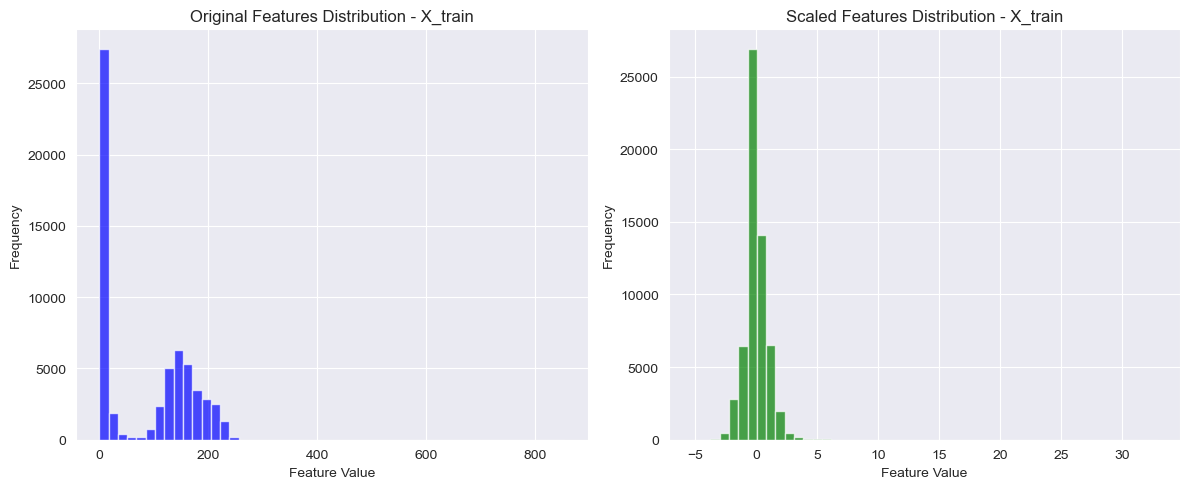

In [61]:
# Feature normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


def plot_feature_distributions(original, scaled, title=""):
    plt.figure(figsize=(12, 5))

    # Plot original features distribution
    plt.subplot(1, 2, 1)
    plt.hist(original.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Original Features Distribution - {title}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")

    # Plot scaled features distribution
    plt.subplot(1, 2, 2)
    plt.hist(scaled.flatten(), bins=50, color='green', alpha=0.7)
    plt.title(f"Scaled Features Distribution - {title}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

plot_feature_distributions(X_train, X_train_scaled, title="X_train")


### SVM

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

# Train SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

#### Evaluate model on test set

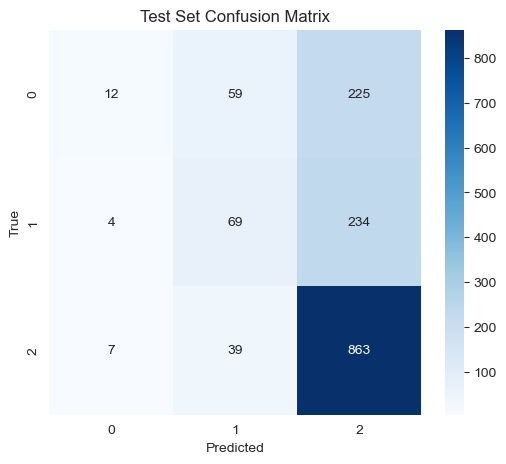


MEL:
    Sensitivity: 0.0405
    Specificity: 0.9910
    Accuracy: 0.8049

NV:
    Sensitivity: 0.2248
    Specificity: 0.9187
    Accuracy: 0.7778

BENIGN:
    Sensitivity: 0.9494
    Specificity: 0.2388
    Accuracy: 0.6660

Overall Results:
Test Accuracy: 0.6243
Test Sensitivity: 0.4049
Test Specificity: 0.7161


In [66]:
# Test the model
test_pred = svm.predict(X_test_scaled)

import matplotlib.pyplot as plt
import numpy as np

def generate_prediction_report(y_true, y_pred, classes, title="Prediction Report"):
    # Generate and display confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Calculate sensitivity, specificity, and accuracy for each class
    metrics = {}
    
    for i, class_name in enumerate(classes):
        # Calculate TP, TN, FP, FN
        TP = cm[i, i]
        FP = cm[:, i].sum() - cm[i, i]
        FN = cm[i, :].sum() - cm[i, i]
        TN = cm.sum() - (TP + FP + FN)

        # Calculate metrics
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (FP + TN) if (FP + TN) != 0 else 0
        accuracy = (TP + TN) / (TP + FN + FP + TN)

        metrics[class_name] = {
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy
        }

        # Print per-class metrics
        print(f"\n{class_name}:")
        print(f"    Sensitivity: {sensitivity:.4f}")
        print(f"    Specificity: {specificity:.4f}")
        print(f"    Accuracy: {accuracy:.4f}")
    
    # Calculate overall metrics
    avg_sensitivity = sum(m['sensitivity'] for m in metrics.values()) / len(classes)
    avg_specificity = sum(m['specificity'] for m in metrics.values()) / len(classes)
    avg_accuracy = accuracy_score(y_true, y_pred)
    
    # Print overall metrics
    print("\nOverall Results:")
    print(f"Test Accuracy: {avg_accuracy:.4f}")
    print(f"Test Sensitivity: {avg_sensitivity:.4f}")
    print(f"Test Specificity: {avg_specificity:.4f}")

classes = ['MEL', 'NV', 'BENIGN']
generate_prediction_report(y_test, test_pred, classes, title="Test Set")

In [20]:
import pandas as pd

def generate_comparison_report(image_names, y_true, y_pred):
    # Map true and predicted labels to indices based on the provided classes list
    class_to_index = {class_name: idx for idx, class_name in enumerate(classes)}
    
    # Map the true and predicted labels to indices
    y_true_mapped = [class_to_index[label] for label in y_true]
    y_pred_mapped = [class_to_index[label] for label in y_pred]
    
    # Create a DataFrame with image names, true labels, and predicted labels
    report_df = pd.DataFrame({
        'Image Name': image_names,
        'True Label': [classes[label] for label in y_true_mapped],
        'Predicted Label': [classes[label] for label in y_pred_mapped]
    })
    
    return report_df

test_image_names = test_data['image'].tolist() 

classes = ['malignant', 'nv', 'benign']

# comparison report
comparison_report = generate_comparison_report(test_image_names, y_test, test_pred)
comparison_report

,Image Name,True Label,Predicted Label
0,ISIC_0034524,nv,nv
1,ISIC_0034525,nv,nv
2,ISIC_0034526,benign,nv
3,ISIC_0034527,nv,nv
4,ISIC_0034528,nv,nv
...,...,...,...
1507,ISIC_0036060,benign,benign
1508,ISIC_0036061,nv,nv
1509,ISIC_0036062,malignant,nv
1510,ISIC_0036063,benign,malignant


### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Label encoding for the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Fit and transform y_train labels to integer encoding
y_valid_encoded = le.transform(y_valid)  # Transform y_valid labels using the same encoder
y_test_encoded = le.transform(y_test)  # Transform y_test labels 

rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,  # Maximum depth of each tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    n_jobs=-1,  # Parallel processing
    random_state=42  # Random seed for reproducibility
)

# Train RF model
rf.fit(X_train_scaled, y_train_encoded)


RandomForestClassifier(n_jobs=-1, random_state=42)

#### Evaluate model on test set

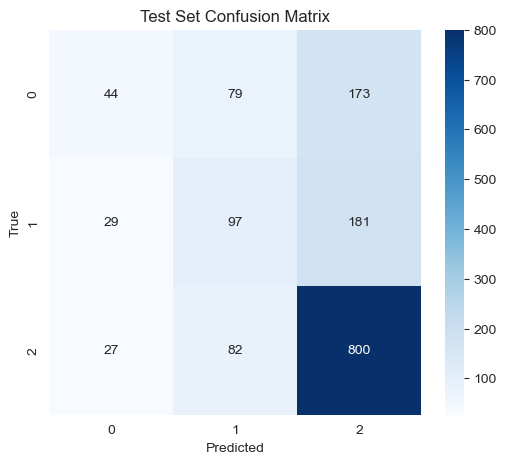


MEL:
    Sensitivity: 0.1486
    Specificity: 0.9539
    Accuracy: 0.7963

NV:
    Sensitivity: 0.3160
    Specificity: 0.8664
    Accuracy: 0.7546

BENIGN:
    Sensitivity: 0.8801
    Specificity: 0.4129
    Accuracy: 0.6938

Overall Results:
Test Accuracy: 0.6224
Test Sensitivity: 0.4482
Test Specificity: 0.7444


In [69]:
test_pred = rf.predict(X_test_scaled)

classes = ['MEL', 'NV', 'BENIGN']  
generate_prediction_report(y_test_encoded, test_pred, classes, title="Test Set")

In [24]:
test_image_names = test_data['image'].tolist()  

classes = ['malignant', 'nv', 'benign']

def generate_comparison_report_1(image_names, y_true, y_pred):
    
    y_pred_labels = [classes[idx] for idx in y_pred]
    
    report_df = pd.DataFrame({
        'Image Name': image_names,
        'True Label': y_true,
        'Predicted Label': y_pred_labels 
    })
    
    return report_df

# Generate the comparison report
comparison_report = generate_comparison_report_1(test_image_names, y_test, test_pred)

comparison_report


,Image Name,True Label,Predicted Label
0,ISIC_0034524,nv,benign
1,ISIC_0034525,nv,nv
2,ISIC_0034526,benign,nv
3,ISIC_0034527,nv,benign
4,ISIC_0034528,nv,benign
...,...,...,...
1507,ISIC_0036060,benign,malignant
1508,ISIC_0036061,nv,benign
1509,ISIC_0036062,malignant,benign
1510,ISIC_0036063,benign,malignant


## Deep Learning Method

### Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNNs) are a class of deep learning models commonly used for processing image and visual data. CNNs are particularly well-suited for tasks such as image classification, image segmentation, and object detection, as they can automatically extract spatial features from input data through a series of convolutional operations.

In this implementation, `SimpleCNN` is designed for a multi-label classification task with 3 output classes, which can be applied to skin lesion classification. Below, we explain the components of the network:

1. **Convolutional Layers**: The `conv_layers` attribute contains multiple convolutional layers stacked sequentially to extract features from the input image. Each convolutional layer is followed by a Batch Normalization layer, a ReLU activation function, and a Max Pooling layer to reduce the spatial dimensions of the data.
   - **Conv Layer 1**: The first convolutional layer uses a 3x3 kernel with 64 output channels. Batch normalization is applied to stabilize the learning process, followed by a ReLU activation function to introduce non-linearity. Max pooling is used to reduce the size of the feature map, improving computational efficiency.
   - **Conv Layers 2, 3, 4**: These layers follow a similar structure, with the output channels progressively increasing to 128, 256, and 512. This allows the network to learn more complex and abstract features at each layer.

2. **Fully Connected Layers**: After the convolutional layers, the network flattens the output and passes it through fully connected layers (`fc_layers`) for classification.
   - **Flattening**: The output from the final convolutional layer is flattened into a vector to prepare it for the fully connected layers.
   - **Linear Layers**: The first linear layer reduces the feature size to 1024, followed by a ReLU activation and dropout for regularization to prevent overfitting. The final linear layer maps the features to the desired number of output classes (`num_classes`).
   - **Sigmoid Activation**: The Sigmoid activation function is used at the output layer for multi-label classification, providing an independent probability score for each class.

3. **Pooling and Regularization**: The use of Max Pooling layers helps to reduce the spatial dimensions of the feature maps while retaining important features, making the model more computationally efficient. Dropout is used in the fully connected layers to prevent overfitting by randomly setting some neuron activations to zero during training.

This architecture is a relatively simple yet effective convolutional neural network that captures spatial features from input images and uses these features for classification. It is suitable for applications such as skin lesion classification, where the model needs to differentiate between multiple types of skin conditions. The convolutional layers are used for feature extraction, while the fully connected layers are used for decision-making, making CNNs highly powerful for visual data tasks.

### The structure of CNN is shown as below:
![Image](https://objectstorage.ap-sydney-1.oraclecloud.com/n/sdgfztegun7d/b/bucket-20240909-1436/o/assignment1_ER-Page-19.drawio%20(1).png)

## Define CNN model

In [37]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # Conv 1: 3x3 convolution, 64 channels, stride 1, ReLU activation
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling to reduce dimensions

            # Conv 2: 3x3 convolution, 128 channels
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling

            # Conv 3: 3x3 convolution, 256 channels
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling

            # Conv 4: 3x3 convolution, 512 channels
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling
        )

        # Fully connected layers; input size determined based on the output from convolutional layers
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 14 * 14, 1024),  # Calculate input size based on input size of 224x224
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout regularization to prevent overfitting
            nn.Linear(1024, num_classes),
            nn.Sigmoid()  # Sigmoid activation for multi-label classification
        )

    def forward(self, x):
        x = self.conv_layers(x)
        diagnosis_output = self.fc_layers(x)
        return diagnosis_output


## Function to calculate metrics

In [27]:
def calculate_metrics(outputs, labels):
    """Calculate model performance metrics for each class"""
    # Convert model outputs to binary predictions (0 or 1) based on a threshold of 0.5
    predictions = (outputs > 0.5).float()
    metrics = {}

    # Iterate over each class to calculate metrics
    for i, class_name in enumerate(['Malignant', 'NV', 'Benign']):
        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for each class
        TP = ((predictions[:, i] == 1) & (labels[:, i] == 1)).sum().float()
        TN = ((predictions[:, i] == 0) & (labels[:, i] == 0)).sum().float()
        FP = ((predictions[:, i] == 1) & (labels[:, i] == 0)).sum().float()
        FN = ((predictions[:, i] == 0) & (labels[:, i] == 1)).sum().float()

        # Calculate performance metrics for the current class
        # Sensitivity (Recall): Proportion of true positives among all actual positives
        sensitivity = (TP / (TP + FN)).item() if (TP + FN) != 0 else 0
        # Specificity: Proportion of true negatives among all actual negatives
        specificity = (TN / (TN + FP)).item() if (TN + FP) != 0 else 0
        # Accuracy: Proportion of correct predictions among all predictions
        accuracy = ((TP + TN) / (TP + TN + FP + FN)).item()

        # Store metrics for the current class
        metrics[class_name] = {
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy
        }

    return metrics

## Define training method and validation method

In [24]:
NUM_CLASSES = 3
BATCH_SIZE = 32
LEARNING_RATE = 0.00001
NUM_EPOCHS = 50
EARLY_STOPPING_PATIENCE = 9
CURRENT_DIR = os.getcwd()

def train_val_model(device, model_name):
    # Initialize the model with specified number of classes
    model = SimpleCNN(num_classes=NUM_CLASSES).to(device)
    criterion_diagnosis = nn.CrossEntropyLoss()  # Define the loss function
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)  # Initialize optimizer with weight decay

    best_val_loss = float('inf')  # Track the best validation loss
    patience_counter = 0  # Initialize patience counter for early stopping

    for epoch in range(NUM_EPOCHS):
        # Training phase
        model.train()  # Set model to training mode
        running_train_diagnosis_loss = 0.0
        all_train_outputs = []
        all_train_labels = []

        train_progress = tqdm(train_loader, desc=f"Epoch {epoch + 1} [Training]")
        for images, diagnosis_labels in train_progress:
            images = images.to(device)
            diagnosis_labels = diagnosis_labels.to(device)

            optimizer.zero_grad()  # Reset gradients
            diagnosis_output = model(images)  # Forward pass
            loss_diagnosis = criterion_diagnosis(diagnosis_output, diagnosis_labels)  # Calculate loss
            loss_diagnosis.backward()  # Backward pass
            optimizer.step()  # Update model parameters

            running_train_diagnosis_loss += loss_diagnosis.item()
            all_train_outputs.append(diagnosis_output.detach().cpu())
            all_train_labels.append(diagnosis_labels.cpu())

            train_progress.set_postfix({"Diagnosis Loss": f"{loss_diagnosis.item():.4f}"})

        # Calculate training performance metrics
        all_outputs = torch.cat(all_train_outputs)
        all_labels = torch.cat(all_train_labels)
        train_metrics = calculate_metrics(all_outputs, all_labels)

        avg_train_diagnosis_loss = running_train_diagnosis_loss / len(train_loader)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        running_val_diagnosis_loss = 0.0
        all_val_outputs = []
        all_val_labels = []

        with torch.no_grad():  # Disable gradient computation for validation
            valid_progress = tqdm(val_loader, desc=f"Epoch {epoch + 1} [Validation]")
            for images, diagnosis_labels in valid_progress:
                images = images.to(device)
                diagnosis_labels = diagnosis_labels.to(device)

                diagnosis_output = model(images)  # Forward pass
                loss_diagnosis = criterion_diagnosis(diagnosis_output, diagnosis_labels)  # Calculate loss

                running_val_diagnosis_loss += loss_diagnosis.item()
                all_val_outputs.append(diagnosis_output.cpu())
                all_val_labels.append(diagnosis_labels.cpu())

                valid_progress.set_postfix({"Diagnosis Loss": f"{loss_diagnosis.item():.4f}"})

        # Calculate validation performance metrics
        all_outputs = torch.cat(all_val_outputs)
        all_labels = torch.cat(all_val_labels)
        val_metrics = calculate_metrics(all_outputs, all_labels)

        avg_val_diagnosis_loss = running_val_diagnosis_loss / len(val_loader)

        # Display detailed performance metrics
        print(f"\nEpoch {epoch + 1}")
        print(f"Training Loss: {avg_train_diagnosis_loss:.4f}")
        print("\nTraining Metrics:")
        for class_name, metrics in train_metrics.items():
            print(f"{class_name}:")
            print(f"  Sensitivity: {metrics['sensitivity']:.4f}")
            print(f"  Specificity: {metrics['specificity']:.4f}")
            print(f"  Accuracy: {metrics['accuracy']:.4f}")

        print(f"\nValidation Loss: {avg_val_diagnosis_loss:.4f}")
        print("\nValidation Metrics:")
        for class_name, metrics in val_metrics.items():
            print(f"{class_name}:")
            print(f"  Sensitivity: {metrics['sensitivity']:.4f}")
            print(f"  Specificity: {metrics['specificity']:.4f}")
            print(f"  Accuracy: {metrics['accuracy']:.4f}")

        # Early stopping
        if avg_val_diagnosis_loss < best_val_loss:
            best_val_loss = avg_val_diagnosis_loss
            torch.save(model, os.path.join(CURRENT_DIR, model_name, f'best_model_epoch_{epoch + 1}.pth'))  # Save model
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1

        if patience_counter >= EARLY_STOPPING_PATIENCE:
            logging.info("Early stopping triggered!")  # Stop training if patience limit is reached
            break

## Start training and validation data

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_val_model(device,'CNN')

Epoch 1 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s, Diagnosis Loss=0.7478]



Epoch 1
Training Loss: 0.9873

Training Metrics:
Malignant:
  Sensitivity: 0.7976
  Specificity: 0.4087
  Accuracy: 0.5359
NV:
  Sensitivity: 0.7018
  Specificity: 0.7169
  Accuracy: 0.7118
Benign:
  Sensitivity: 0.7599
  Specificity: 0.4798
  Accuracy: 0.5739

Validation Loss: 0.9094

Validation Metrics:
Malignant:
  Sensitivity: 0.7792
  Specificity: 0.5086
  Accuracy: 0.6166
NV:
  Sensitivity: 0.8852
  Specificity: 0.6288
  Accuracy: 0.7098
Benign:
  Sensitivity: 0.9273
  Specificity: 0.4203
  Accuracy: 0.5648


Epoch 2 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s, Diagnosis Loss=0.8292]



Epoch 2
Training Loss: 0.9470

Training Metrics:
Malignant:
  Sensitivity: 0.8071
  Specificity: 0.4727
  Accuracy: 0.5850
NV:
  Sensitivity: 0.7412
  Specificity: 0.7641
  Accuracy: 0.7566
Benign:
  Sensitivity: 0.7201
  Specificity: 0.5893
  Accuracy: 0.6332

Validation Loss: 0.9133

Validation Metrics:
Malignant:
  Sensitivity: 0.8235
  Specificity: 0.5680
  Accuracy: 0.6580
NV:
  Sensitivity: 0.7015
  Specificity: 0.8413
  Accuracy: 0.7927
Benign:
  Sensitivity: 0.8276
  Specificity: 0.4296
  Accuracy: 0.5492


Epoch 3 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s, Diagnosis Loss=0.6178]



Epoch 3
Training Loss: 0.9370

Training Metrics:
Malignant:
  Sensitivity: 0.8350
  Specificity: 0.4827
  Accuracy: 0.6014
NV:
  Sensitivity: 0.7454
  Specificity: 0.7767
  Accuracy: 0.7666
Benign:
  Sensitivity: 0.7706
  Specificity: 0.5359
  Accuracy: 0.6157

Validation Loss: 0.8852

Validation Metrics:
Malignant:
  Sensitivity: 1.0000
  Specificity: 0.3258
  Accuracy: 0.5389
NV:
  Sensitivity: 0.5362
  Specificity: 0.9758
  Accuracy: 0.8187
Benign:
  Sensitivity: 0.9206
  Specificity: 0.5077
  Accuracy: 0.6425


Epoch 4 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s, Diagnosis Loss=0.8815]



Epoch 4
Training Loss: 0.9328

Training Metrics:
Malignant:
  Sensitivity: 0.8306
  Specificity: 0.4887
  Accuracy: 0.6042
NV:
  Sensitivity: 0.7440
  Specificity: 0.7872
  Accuracy: 0.7729
Benign:
  Sensitivity: 0.7075
  Specificity: 0.6131
  Accuracy: 0.6444

Validation Loss: 0.9119

Validation Metrics:
Malignant:
  Sensitivity: 0.7903
  Specificity: 0.4962
  Accuracy: 0.5907
NV:
  Sensitivity: 0.6909
  Specificity: 0.8768
  Accuracy: 0.8238
Benign:
  Sensitivity: 0.9474
  Specificity: 0.3419
  Accuracy: 0.5803


Epoch 5 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s, Diagnosis Loss=0.7710]



Epoch 5
Training Loss: 0.9242

Training Metrics:
Malignant:
  Sensitivity: 0.8265
  Specificity: 0.5158
  Accuracy: 0.6188
NV:
  Sensitivity: 0.7906
  Specificity: 0.7549
  Accuracy: 0.7669
Benign:
  Sensitivity: 0.7693
  Specificity: 0.5621
  Accuracy: 0.6308

Validation Loss: 0.8513

Validation Metrics:
Malignant:
  Sensitivity: 0.9206
  Specificity: 0.4462
  Accuracy: 0.6010
NV:
  Sensitivity: 0.8254
  Specificity: 0.8923
  Accuracy: 0.8705
Benign:
  Sensitivity: 0.8657
  Specificity: 0.5556
  Accuracy: 0.6632


Epoch 6 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s, Diagnosis Loss=1.0574]



Epoch 6
Training Loss: 0.9224

Training Metrics:
Malignant:
  Sensitivity: 0.8189
  Specificity: 0.5215
  Accuracy: 0.6175
NV:
  Sensitivity: 0.7863
  Specificity: 0.7610
  Accuracy: 0.7695
Benign:
  Sensitivity: 0.7532
  Specificity: 0.5884
  Accuracy: 0.6443

Validation Loss: 0.8669

Validation Metrics:
Malignant:
  Sensitivity: 0.9692
  Specificity: 0.5859
  Accuracy: 0.7150
NV:
  Sensitivity: 0.8438
  Specificity: 0.9380
  Accuracy: 0.9067
Benign:
  Sensitivity: 0.7969
  Specificity: 0.5271
  Accuracy: 0.6166


Epoch 7 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s, Diagnosis Loss=0.6974]



Epoch 7
Training Loss: 0.9152

Training Metrics:
Malignant:
  Sensitivity: 0.7902
  Specificity: 0.5803
  Accuracy: 0.6486
NV:
  Sensitivity: 0.7657
  Specificity: 0.8003
  Accuracy: 0.7889
Benign:
  Sensitivity: 0.7544
  Specificity: 0.5831
  Accuracy: 0.6424

Validation Loss: 0.8187

Validation Metrics:
Malignant:
  Sensitivity: 0.7627
  Specificity: 0.6791
  Accuracy: 0.7047
NV:
  Sensitivity: 0.8592
  Specificity: 0.8770
  Accuracy: 0.8705
Benign:
  Sensitivity: 0.8889
  Specificity: 0.5000
  Accuracy: 0.6269


Epoch 8 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s, Diagnosis Loss=0.8729]



Epoch 8
Training Loss: 0.9088

Training Metrics:
Malignant:
  Sensitivity: 0.8162
  Specificity: 0.5520
  Accuracy: 0.6394
NV:
  Sensitivity: 0.7834
  Specificity: 0.8013
  Accuracy: 0.7953
Benign:
  Sensitivity: 0.7542
  Specificity: 0.5926
  Accuracy: 0.6469

Validation Loss: 0.8667

Validation Metrics:
Malignant:
  Sensitivity: 0.9559
  Specificity: 0.5520
  Accuracy: 0.6943
NV:
  Sensitivity: 0.8286
  Specificity: 0.9268
  Accuracy: 0.8912
Benign:
  Sensitivity: 0.9636
  Specificity: 0.3406
  Accuracy: 0.5181


Epoch 9 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s, Diagnosis Loss=0.5953]



Epoch 9
Training Loss: 0.9097

Training Metrics:
Malignant:
  Sensitivity: 0.8158
  Specificity: 0.5680
  Accuracy: 0.6503
NV:
  Sensitivity: 0.7670
  Specificity: 0.7957
  Accuracy: 0.7863
Benign:
  Sensitivity: 0.7722
  Specificity: 0.5672
  Accuracy: 0.6371

Validation Loss: 0.7906

Validation Metrics:
Malignant:
  Sensitivity: 0.9231
  Specificity: 0.5781
  Accuracy: 0.6943
NV:
  Sensitivity: 0.9054
  Specificity: 0.8824
  Accuracy: 0.8912
Benign:
  Sensitivity: 0.8333
  Specificity: 0.6115
  Accuracy: 0.6736


Epoch 10 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s, Diagnosis Loss=0.5516]



Epoch 10
Training Loss: 0.9049

Training Metrics:
Malignant:
  Sensitivity: 0.8120
  Specificity: 0.5631
  Accuracy: 0.6458
NV:
  Sensitivity: 0.7968
  Specificity: 0.7764
  Accuracy: 0.7832
Benign:
  Sensitivity: 0.7581
  Specificity: 0.6070
  Accuracy: 0.6575

Validation Loss: 0.7838

Validation Metrics:
Malignant:
  Sensitivity: 0.8333
  Specificity: 0.6850
  Accuracy: 0.7358
NV:
  Sensitivity: 0.7581
  Specificity: 0.9542
  Accuracy: 0.8912
Benign:
  Sensitivity: 0.9077
  Specificity: 0.5078
  Accuracy: 0.6425


Epoch 11 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s, Diagnosis Loss=0.5626]



Epoch 11
Training Loss: 0.9016

Training Metrics:
Malignant:
  Sensitivity: 0.7992
  Specificity: 0.5900
  Accuracy: 0.6592
NV:
  Sensitivity: 0.7913
  Specificity: 0.7830
  Accuracy: 0.7857
Benign:
  Sensitivity: 0.7605
  Specificity: 0.6074
  Accuracy: 0.6595

Validation Loss: 0.7707

Validation Metrics:
Malignant:
  Sensitivity: 0.9194
  Specificity: 0.6260
  Accuracy: 0.7202
NV:
  Sensitivity: 0.9000
  Specificity: 0.8943
  Accuracy: 0.8964
Benign:
  Sensitivity: 0.7213
  Specificity: 0.6818
  Accuracy: 0.6943


Epoch 12 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s, Diagnosis Loss=1.5512]



Epoch 12
Training Loss: 0.9044

Training Metrics:
Malignant:
  Sensitivity: 0.8163
  Specificity: 0.5818
  Accuracy: 0.6584
NV:
  Sensitivity: 0.7989
  Specificity: 0.7656
  Accuracy: 0.7767
Benign:
  Sensitivity: 0.7656
  Specificity: 0.5880
  Accuracy: 0.6480

Validation Loss: 0.8884

Validation Metrics:
Malignant:
  Sensitivity: 0.9130
  Specificity: 0.7903
  Accuracy: 0.8342
NV:
  Sensitivity: 0.8286
  Specificity: 0.9350
  Accuracy: 0.8964
Benign:
  Sensitivity: 0.9074
  Specificity: 0.5396
  Accuracy: 0.6425


Epoch 13 [Validation]: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s, Diagnosis Loss=0.5899]



Epoch 13
Training Loss: 0.8973

Training Metrics:
Malignant:
  Sensitivity: 0.8195
  Specificity: 0.5911
  Accuracy: 0.6661
NV:
  Sensitivity: 0.7815
  Specificity: 0.8059
  Accuracy: 0.7976
Benign:
  Sensitivity: 0.7397
  Specificity: 0.6214
  Accuracy: 0.6606

Validation Loss: 0.7890

Validation Metrics:
Malignant:
  Sensitivity: 0.9077
  Specificity: 0.6328
  Accuracy: 0.7254
NV:
  Sensitivity: 0.7656
  Specificity: 0.9225
  Accuracy: 0.8705
Benign:
  Sensitivity: 0.8594
  Specificity: 0.6047
  Accuracy: 0.6891


Epoch 14 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s, Diagnosis Loss=0.8192]



Epoch 14
Training Loss: 0.8883

Training Metrics:
Malignant:
  Sensitivity: 0.8172
  Specificity: 0.6026
  Accuracy: 0.6741
NV:
  Sensitivity: 0.7862
  Specificity: 0.8040
  Accuracy: 0.7980
Benign:
  Sensitivity: 0.7368
  Specificity: 0.6508
  Accuracy: 0.6792

Validation Loss: 0.8150

Validation Metrics:
Malignant:
  Sensitivity: 0.8611
  Specificity: 0.6033
  Accuracy: 0.6995
NV:
  Sensitivity: 0.7593
  Specificity: 0.9281
  Accuracy: 0.8808
Benign:
  Sensitivity: 0.9701
  Specificity: 0.5873
  Accuracy: 0.7202


Epoch 15 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s, Diagnosis Loss=0.9913]



Epoch 15
Training Loss: 0.8889

Training Metrics:
Malignant:
  Sensitivity: 0.8263
  Specificity: 0.5905
  Accuracy: 0.6703
NV:
  Sensitivity: 0.8074
  Specificity: 0.7939
  Accuracy: 0.7984
Benign:
  Sensitivity: 0.7674
  Specificity: 0.6126
  Accuracy: 0.6633

Validation Loss: 0.8291

Validation Metrics:
Malignant:
  Sensitivity: 0.7442
  Specificity: 0.7570
  Accuracy: 0.7513
NV:
  Sensitivity: 0.8367
  Specificity: 0.9167
  Accuracy: 0.8964
Benign:
  Sensitivity: 0.8966
  Specificity: 0.6815
  Accuracy: 0.7461


Epoch 16 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s, Diagnosis Loss=1.5431]



Epoch 16
Training Loss: 0.8800

Training Metrics:
Malignant:
  Sensitivity: 0.8053
  Specificity: 0.6262
  Accuracy: 0.6864
NV:
  Sensitivity: 0.8025
  Specificity: 0.8026
  Accuracy: 0.8026
Benign:
  Sensitivity: 0.7397
  Specificity: 0.6728
  Accuracy: 0.6947

Validation Loss: 0.8698

Validation Metrics:
Malignant:
  Sensitivity: 0.9000
  Specificity: 0.6241
  Accuracy: 0.7098
NV:
  Sensitivity: 0.9153
  Specificity: 0.9478
  Accuracy: 0.9378
Benign:
  Sensitivity: 0.8919
  Specificity: 0.7395
  Accuracy: 0.7979


Epoch 17 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s, Diagnosis Loss=0.5515]



Epoch 17
Training Loss: 0.8908

Training Metrics:
Malignant:
  Sensitivity: 0.7949
  Specificity: 0.6330
  Accuracy: 0.6865
NV:
  Sensitivity: 0.7629
  Specificity: 0.8162
  Accuracy: 0.7986
Benign:
  Sensitivity: 0.7097
  Specificity: 0.6645
  Accuracy: 0.6799

Validation Loss: 0.7986

Validation Metrics:
Malignant:
  Sensitivity: 0.7759
  Specificity: 0.6741
  Accuracy: 0.7047
NV:
  Sensitivity: 0.8333
  Specificity: 0.8512
  Accuracy: 0.8446
Benign:
  Sensitivity: 0.8571
  Specificity: 0.6308
  Accuracy: 0.7047


Epoch 18 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s, Diagnosis Loss=0.5515]



Epoch 18
Training Loss: 0.8836

Training Metrics:
Malignant:
  Sensitivity: 0.7973
  Specificity: 0.6392
  Accuracy: 0.6923
NV:
  Sensitivity: 0.7845
  Specificity: 0.8094
  Accuracy: 0.8015
Benign:
  Sensitivity: 0.7330
  Specificity: 0.6570
  Accuracy: 0.6834

Validation Loss: 0.7369

Validation Metrics:
Malignant:
  Sensitivity: 0.9474
  Specificity: 0.7350
  Accuracy: 0.8187
NV:
  Sensitivity: 0.8800
  Specificity: 0.9301
  Accuracy: 0.9171
Benign:
  Sensitivity: 0.9552
  Specificity: 0.4286
  Accuracy: 0.6114


Epoch 19 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s, Diagnosis Loss=0.5516]



Epoch 19
Training Loss: 0.8816

Training Metrics:
Malignant:
  Sensitivity: 0.8149
  Specificity: 0.6077
  Accuracy: 0.6781
NV:
  Sensitivity: 0.7806
  Specificity: 0.8236
  Accuracy: 0.8096
Benign:
  Sensitivity: 0.7235
  Specificity: 0.6755
  Accuracy: 0.6916

Validation Loss: 0.7755

Validation Metrics:
Malignant:
  Sensitivity: 0.8551
  Specificity: 0.6613
  Accuracy: 0.7306
NV:
  Sensitivity: 0.8276
  Specificity: 0.9111
  Accuracy: 0.8860
Benign:
  Sensitivity: 0.8939
  Specificity: 0.5591
  Accuracy: 0.6736


Epoch 20 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s, Diagnosis Loss=0.8386]



Epoch 20
Training Loss: 0.8740

Training Metrics:
Malignant:
  Sensitivity: 0.8290
  Specificity: 0.6310
  Accuracy: 0.6967
NV:
  Sensitivity: 0.8042
  Specificity: 0.8026
  Accuracy: 0.8031
Benign:
  Sensitivity: 0.7735
  Specificity: 0.6338
  Accuracy: 0.6812

Validation Loss: 0.7994

Validation Metrics:
Malignant:
  Sensitivity: 0.7808
  Specificity: 0.7500
  Accuracy: 0.7617
NV:
  Sensitivity: 0.8947
  Specificity: 0.9044
  Accuracy: 0.9016
Benign:
  Sensitivity: 0.9206
  Specificity: 0.6308
  Accuracy: 0.7254


Epoch 21 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s, Diagnosis Loss=0.7233]



Epoch 21
Training Loss: 0.8797

Training Metrics:
Malignant:
  Sensitivity: 0.7982
  Specificity: 0.6364
  Accuracy: 0.6895
NV:
  Sensitivity: 0.7952
  Specificity: 0.8052
  Accuracy: 0.8018
Benign:
  Sensitivity: 0.7372
  Specificity: 0.6735
  Accuracy: 0.6948

Validation Loss: 0.7797

Validation Metrics:
Malignant:
  Sensitivity: 0.9077
  Specificity: 0.6406
  Accuracy: 0.7306
NV:
  Sensitivity: 0.8788
  Specificity: 0.8819
  Accuracy: 0.8808
Benign:
  Sensitivity: 0.8710
  Specificity: 0.7099
  Accuracy: 0.7617


Epoch 22 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s, Diagnosis Loss=0.8425]



Epoch 22
Training Loss: 0.8781

Training Metrics:
Malignant:
  Sensitivity: 0.8337
  Specificity: 0.6003
  Accuracy: 0.6796
NV:
  Sensitivity: 0.8108
  Specificity: 0.7876
  Accuracy: 0.7953
Benign:
  Sensitivity: 0.7467
  Specificity: 0.6593
  Accuracy: 0.6881

Validation Loss: 0.7757

Validation Metrics:
Malignant:
  Sensitivity: 0.8281
  Specificity: 0.8527
  Accuracy: 0.8446
NV:
  Sensitivity: 0.9167
  Specificity: 0.8760
  Accuracy: 0.8912
Benign:
  Sensitivity: 0.9298
  Specificity: 0.6103
  Accuracy: 0.7047


Epoch 23 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s, Diagnosis Loss=0.7686]



Epoch 23
Training Loss: 0.8727

Training Metrics:
Malignant:
  Sensitivity: 0.8165
  Specificity: 0.6280
  Accuracy: 0.6898
NV:
  Sensitivity: 0.8073
  Specificity: 0.8010
  Accuracy: 0.8031
Benign:
  Sensitivity: 0.7572
  Specificity: 0.6730
  Accuracy: 0.7012

Validation Loss: 0.8052

Validation Metrics:
Malignant:
  Sensitivity: 0.8361
  Specificity: 0.6439
  Accuracy: 0.7047
NV:
  Sensitivity: 0.8406
  Specificity: 0.9516
  Accuracy: 0.9119
Benign:
  Sensitivity: 0.8095
  Specificity: 0.6692
  Accuracy: 0.7150


Epoch 24 [Validation]: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s, Diagnosis Loss=0.5520]



Epoch 24
Training Loss: 0.8672

Training Metrics:
Malignant:
  Sensitivity: 0.8103
  Specificity: 0.6536
  Accuracy: 0.7050
NV:
  Sensitivity: 0.8176
  Specificity: 0.8041
  Accuracy: 0.8087
Benign:
  Sensitivity: 0.7461
  Specificity: 0.6790
  Accuracy: 0.7013

Validation Loss: 0.7520

Validation Metrics:
Malignant:
  Sensitivity: 0.9315
  Specificity: 0.6667
  Accuracy: 0.7668
NV:
  Sensitivity: 0.9355
  Specificity: 0.8550
  Accuracy: 0.8808
Benign:
  Sensitivity: 0.7586
  Specificity: 0.7407
  Accuracy: 0.7461


Epoch 25 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s, Diagnosis Loss=0.6896]



Epoch 25
Training Loss: 0.8708

Training Metrics:
Malignant:
  Sensitivity: 0.8225
  Specificity: 0.6353
  Accuracy: 0.6981
NV:
  Sensitivity: 0.7991
  Specificity: 0.8098
  Accuracy: 0.8063
Benign:
  Sensitivity: 0.7461
  Specificity: 0.6786
  Accuracy: 0.7013

Validation Loss: 0.7892

Validation Metrics:
Malignant:
  Sensitivity: 0.9118
  Specificity: 0.6720
  Accuracy: 0.7565
NV:
  Sensitivity: 0.8873
  Specificity: 0.8525
  Accuracy: 0.8653
Benign:
  Sensitivity: 0.6481
  Specificity: 0.8201
  Accuracy: 0.7720


Epoch 26 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s, Diagnosis Loss=0.9062]



Epoch 26
Training Loss: 0.8679

Training Metrics:
Malignant:
  Sensitivity: 0.8254
  Specificity: 0.6519
  Accuracy: 0.7091
NV:
  Sensitivity: 0.8026
  Specificity: 0.7984
  Accuracy: 0.7998
Benign:
  Sensitivity: 0.7254
  Specificity: 0.6960
  Accuracy: 0.7059

Validation Loss: 0.8059

Validation Metrics:
Malignant:
  Sensitivity: 0.7627
  Specificity: 0.8060
  Accuracy: 0.7927
NV:
  Sensitivity: 0.8649
  Specificity: 0.9580
  Accuracy: 0.9223
Benign:
  Sensitivity: 0.9500
  Specificity: 0.5639
  Accuracy: 0.6839


Epoch 27 [Validation]: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s, Diagnosis Loss=0.8774]


Epoch 27
Training Loss: 0.8701

Training Metrics:
Malignant:
  Sensitivity: 0.8043
  Specificity: 0.6534
  Accuracy: 0.7026
NV:
  Sensitivity: 0.8084
  Specificity: 0.8104
  Accuracy: 0.8098
Benign:
  Sensitivity: 0.7601
  Specificity: 0.6483
  Accuracy: 0.6866

Validation Loss: 0.8211

Validation Metrics:
Malignant:
  Sensitivity: 0.8750
  Specificity: 0.6512
  Accuracy: 0.7254
NV:
  Sensitivity: 0.7903
  Specificity: 0.9008
  Accuracy: 0.8653
Benign:
  Sensitivity: 0.8806
  Specificity: 0.6349
  Accuracy: 0.7202


## Show the result of training and validation result

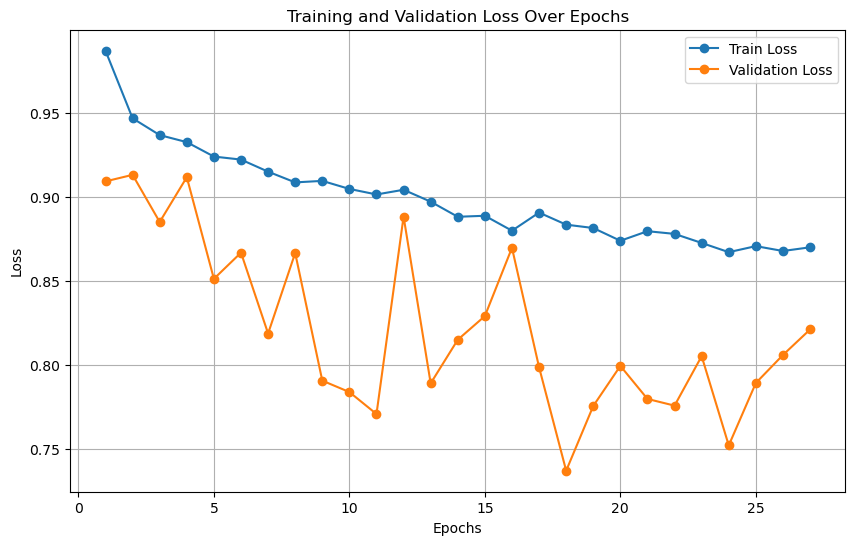

In [5]:
train_loss = [
    0.9873, 0.9470, 0.9370, 0.9328, 0.9242, 0.9224, 0.9152, 0.9088, 0.9097, 
    0.9049, 0.9016, 0.9044, 0.8973, 0.8883, 0.8889, 0.8800, 0.8908, 0.8836, 
    0.8816, 0.8740, 0.8797, 0.8781, 0.8727, 0.8672, 0.8708, 0.8679, 0.8701
]

val_loss = [
    0.9094, 0.9133, 0.8852, 0.9119, 0.8513, 0.8669, 0.8187, 0.8667, 0.7906, 
    0.7838, 0.7707, 0.8884, 0.7890, 0.8150, 0.8291, 0.8698, 0.7986, 0.7369, 
    0.7755, 0.7994, 0.7797, 0.7757, 0.8052, 0.7520, 0.7892, 0.8059, 0.8211
]
# Plotting train and validation loss over epochs
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


### When analyzing the trend of Training Loss and Validation Loss, we can observe the following points:

- Overall Downward Trend: The training loss shows a relatively steady downward trend throughout the training process, indicating that the model is learning and gradually fitting the training data. The reduction in training loss typically suggests that the model parameters are continuously updated to minimize the loss function, meaning the model is improving its performance on the training set.

- Fluctuations in Validation Loss: The validation loss exhibits instability across multiple epochs, with noticeable fluctuations. This volatility suggests that the model's performance on the validation set is less stable compared to the training set, possibly indicating overfitting. While the training loss decreases steadily, the validation loss does not consistently decline and even increases at some epochs, suggesting that the model performs well on the training set but lacks generalization capability on unseen data.

## Test the model

### Load the test dataset

In [28]:
# Prepare the test dataset without lesion grouping
test_dataset = SkinLesionDataset(
    ground_truth_csv=f'../skin_lesion/dataset/2018/ISIC2018_Task3_Test_GroundTruth.csv',  # Path to the ground truth labels CSV
    img_dir=f'../skin_lesion/dataset/2018/ISIC2018_Task3_Test_Input',  # Directory for test images
    # Do not apply data augmentation for testing
    transform=get_transforms(is_train=False)  # Use only basic transformations for evaluation
)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)  
# Data loader with specified batch size, no shuffling for testing


             image classes         GT
0     ISIC_0034524      NV  [0, 1, 0]
1     ISIC_0034525      NV  [0, 1, 0]
2     ISIC_0034526  BENIGN  [0, 0, 1]
3     ISIC_0034527      NV  [0, 1, 0]
4     ISIC_0034528      NV  [0, 1, 0]
...            ...     ...        ...
1507  ISIC_0036060  BENIGN  [0, 0, 1]
1508  ISIC_0036061      NV  [0, 1, 0]
1509  ISIC_0036062     MEL  [1, 0, 0]
1510  ISIC_0036063  BENIGN  [0, 0, 1]
1511  ISIC_0036064     MEL  [1, 0, 0]

[1512 rows x 3 columns]


In [78]:
def test_model(device):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)
    """
    Function to test the model.

    Parameters:
    - device: Device for testing (CPU or GPU).
    - model_dir: Directory where the model file is located.
    - output_dir: Directory for test outputs.
    """

    model_path = 'F:\\CNN\\best_model_epoch_18.pth'

    # Load the model
    model = torch.load(model_path)
    # Load the model to the specified device
    model.to(device)
    # Switch to evaluation mode
    model.eval()
    # Define binary cross-entropy loss
    criterion = nn.CrossEntropyLoss()
    # Initialize lists to store labels and predictions
    all_labels = []  # Ground truth labels
    all_preds = []   # Predicted values
    total_loss = 0.0
    # No gradient calculation
    with torch.no_grad():
        # Iterate over the test dataset loader
        for images, diagnosis_labels in test_loader:
            # Load images to the device
            images = images.to(device)
            # Load multi-class labels to the device
            diagnosis_labels = diagnosis_labels.to(device)
            # Store model output
            diagnosis_output = model(images)

            loss = criterion(diagnosis_output, diagnosis_labels)
            total_loss += loss.item()
            # Use argmax to select the index of the maximum probability as the predicted class
            # Set the maximum probability index to 1 and others to 0
            diagnosis_preds = (diagnosis_output == diagnosis_output.max(dim=1, keepdim=True)[0]).float()

            # Store ground truth labels
            all_labels.extend(diagnosis_labels.cpu().numpy())
            # Store predicted values
            all_preds.extend(diagnosis_preds.cpu().numpy())

            # Log prediction results for each batch
            for j in range(len(diagnosis_labels)):
                true_label = diagnosis_labels[j].cpu().numpy()
                pred_label = diagnosis_preds[j].cpu().numpy()
                print(f"Sample { BATCH_SIZE + j + 1}: True: {true_label}, Predicted: {pred_label}")

    # Reshape labels and predictions to 2D arrays according to the total number of classes
    all_labels = np.array(all_labels).reshape(-1, NUM_CLASSES)
    all_preds = np.array(all_preds).reshape(-1, NUM_CLASSES)

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)

    sensitivity = recall_score(all_labels, all_preds, average='macro', zero_division=0)  # Sensitivity is recall

    # Calculate metrics for each class
    class_names = ['MEL', 'NV', 'BENIGN']
    specificities = []  # List to store specificities for averaging
    
    for i, class_name in enumerate(class_names):
        # Get current class labels and predictions
        true_labels = all_labels[:, i]
        pred_labels = all_preds[:, i]
        
        # Calculate TP, TN, FP, FN
        TP = np.sum((true_labels == 1) & (pred_labels == 1))
        TN = np.sum((true_labels == 0) & (pred_labels == 0))
        FP = np.sum((true_labels == 0) & (pred_labels == 1))
        FN = np.sum((true_labels == 1) & (pred_labels == 0))
        
        # Calculate metrics
        sensitivity_i = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity_i = TN / (TN + FP) if (TN + FP) != 0 else 0
        accuracy_i = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
        
        specificities.append(specificity_i)
        
        print(f"\n{class_name}:")
        print(f"    Sensitivity: {sensitivity_i:.4f}")
        print(f"    Specificity: {specificity_i:.4f}")
        print(f"    Accuracy: {accuracy_i:.4f}")
    
    # Calculate average specificity
    specificity = np.mean(specificities)
    
    # Log overall information
    print(f"\nOverall Results:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Sensitivity: {sensitivity:.4f}")
    print(f"Test Specificity: {specificity:.4f}")

## Test result of CNN

In [79]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_model(device)

Sample 33: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 34: True: [0. 1. 0.], Predicted: [0. 0. 1.]
Sample 35: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 36: True: [0. 1. 0.], Predicted: [0. 0. 1.]
Sample 37: True: [1. 0. 0.], Predicted: [0. 1. 0.]
Sample 38: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 39: True: [0. 1. 0.], Predicted: [0. 0. 1.]
Sample 40: True: [0. 1. 0.], Predicted: [1. 0. 0.]
Sample 41: True: [0. 1. 0.], Predicted: [1. 0. 0.]
Sample 42: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 43: True: [0. 0. 1.], Predicted: [1. 0. 0.]
Sample 44: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 45: True: [0. 0. 1.], Predicted: [1. 0. 0.]
Sample 46: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 47: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 48: True: [1. 0. 0.], Predicted: [0. 0. 1.]
Sample 49: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 50: True: [0. 1. 0.], Predicted: [0. 0. 1.]
Sample 51: True: [0. 1. 0.], Predicted: [0. 0. 1.]
Sample 52: True: [0. 1. 0.], Pr

## Confusion Matrix of CNN

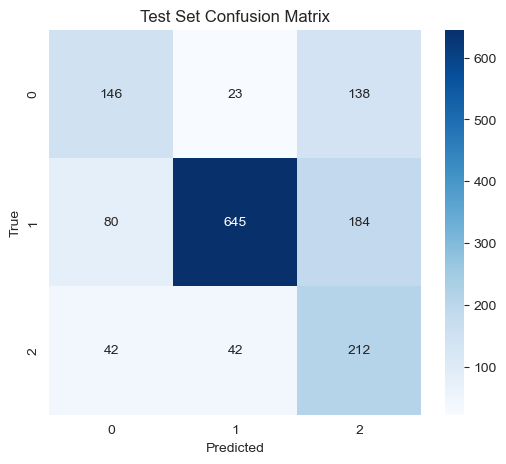

In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_list = []
predicted_list = []

with open("cnnTruePredicted.txt") as data:

    for line in data:
        # Extracting True values and converting to a list
        true_values_str = line.split("True: ")[1].split(", Predicted:")[0].strip()
        true_values = [float(i) for i in true_values_str.replace('[', '').replace(']', '').split()]
        true_index = true_values.index(1.0) if 1.0 in true_values else None
        true_list.append(true_index)

        # Extracting Predicted values and converting to a list
        predicted_values_str = line.split("Predicted: ")[1].strip()
        predicted_values = [float(i) for i in predicted_values_str.replace('[', '').replace(']', '').split()]
        predicted_index = predicted_values.index(1.0) if 1.0 in predicted_values else None
        predicted_list.append(predicted_index)

cm = confusion_matrix(true_list, predicted_list)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Set Confusion Matrix')
plt.show()


## ResNet-50 as Backbone

### Introduction to ResNet-50

**ResNet-50** is a deep convolutional neural network that is part of the Residual Networks (ResNet) family, which was introduced by **Kaiming He et al.** in 2015. The key innovation of ResNet is the use of **residual connections**, which help mitigate the **vanishing gradient problem** and make it possible to train very deep networks. 

ResNet-50 is a **50-layer** version of ResNet, consisting of a series of **convolutional layers**, **batch normalization**, and **ReLU activation functions**, along with shortcut connections that bypass some of these layers. These **skip connections** enable gradients to flow more easily during backpropagation, allowing deeper networks to converge faster and achieve better performance.

**ResNet-50** is known for its strong feature extraction capabilities and has been widely used in various computer vision tasks, such as **image classification**, **object detection**, and **segmentation**. It strikes a good balance between depth and computational efficiency, making it a popular choice for many real-world applications.

### The structure of ResNet-50 is:
![Image](https://objectstorage.ap-sydney-1.oraclecloud.com/n/sdgfztegun7d/b/bucket-20240909-1436/o/%E5%9B%BE%E7%89%87_20241109131848.png)

## Define ResNet-50 model

In [17]:
class SkinLesionClassifier(nn.Module):
    def __init__(self, num_classes=3):
        # Inherit from nn.Module
        super(SkinLesionClassifier, self).__init__()
        # Set the backbone network to ResNet and load pretrained weights
        # self.backbone = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.backbone = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        # Replace the last fully connected layer of ResNet-50 with a new linear layer
        # Set the input to match the feature size of the original fully connected layer
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        # Global average pooling layer
        features = self.backbone.avgpool(
            # Residual block layers
            self.backbone.layer4(
                self.backbone.layer3(
                    self.backbone.layer2(
                        self.backbone.layer1(
                            # Max pooling layer
                            self.backbone.maxpool(
                                # ReLU activation function layer
                                self.backbone.relu(
                                    # Batch normalization layer
                                    self.backbone.bn1(
                                        # First convolutional layer
                                        self.backbone.conv1(x))))))))).flatten(1)  # Flatten features
        # Use sigmoid to restrict the output to the range [0, 1], outputting probabilities for 3 classes
        diagnosis_output = torch.sigmoid(self.backbone.fc(features))
        return diagnosis_output


## Start training and validation

In [13]:
def train_val_Res_model(device, model_name):
    # Initialize the model with specified number of classes
    model = SkinLesionClassifier(num_classes=NUM_CLASSES).to(device)
    criterion_diagnosis = nn.CrossEntropyLoss()  # Define the loss function
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)  # Initialize optimizer with weight decay

    best_val_loss = float('inf')  # Track the best validation loss
    patience_counter = 0  # Initialize patience counter for early stopping

    for epoch in range(NUM_EPOCHS):
        # Training phase
        model.train()  # Set model to training mode
        running_train_diagnosis_loss = 0.0
        all_train_outputs = []
        all_train_labels = []

        train_progress = tqdm(train_loader, desc=f"Epoch {epoch + 1} [Training]")
        for images, diagnosis_labels in train_progress:
            images = images.to(device)
            diagnosis_labels = diagnosis_labels.to(device)

            optimizer.zero_grad()  # Reset gradients
            diagnosis_output = model(images)  # Forward pass
            loss_diagnosis = criterion_diagnosis(diagnosis_output, diagnosis_labels)  # Calculate loss
            loss_diagnosis.backward()  # Backward pass
            optimizer.step()  # Update model parameters

            running_train_diagnosis_loss += loss_diagnosis.item()
            all_train_outputs.append(diagnosis_output.detach().cpu())
            all_train_labels.append(diagnosis_labels.cpu())

            train_progress.set_postfix({"Diagnosis Loss": f"{loss_diagnosis.item():.4f}"})

        # Calculate training performance metrics
        all_outputs = torch.cat(all_train_outputs)
        all_labels = torch.cat(all_train_labels)
        train_metrics = calculate_metrics(all_outputs, all_labels)

        avg_train_diagnosis_loss = running_train_diagnosis_loss / len(train_loader)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        running_val_diagnosis_loss = 0.0
        all_val_outputs = []
        all_val_labels = []

        with torch.no_grad():  # Disable gradient computation for validation
            valid_progress = tqdm(val_loader, desc=f"Epoch {epoch + 1} [Validation]")
            for images, diagnosis_labels in valid_progress:
                images = images.to(device)
                diagnosis_labels = diagnosis_labels.to(device)

                diagnosis_output = model(images)  # Forward pass
                loss_diagnosis = criterion_diagnosis(diagnosis_output, diagnosis_labels)  # Calculate loss

                running_val_diagnosis_loss += loss_diagnosis.item()
                all_val_outputs.append(diagnosis_output.cpu())
                all_val_labels.append(diagnosis_labels.cpu())

                valid_progress.set_postfix({"Diagnosis Loss": f"{loss_diagnosis.item():.4f}"})

        # Calculate validation performance metrics
        all_outputs = torch.cat(all_val_outputs)
        all_labels = torch.cat(all_val_labels)
        val_metrics = calculate_metrics(all_outputs, all_labels)

        avg_val_diagnosis_loss = running_val_diagnosis_loss / len(val_loader)

        # Display detailed performance metrics
        print(f"\nEpoch {epoch + 1}")
        print(f"Training Loss: {avg_train_diagnosis_loss:.4f}")
        print("\nTraining Metrics:")
        for class_name, metrics in train_metrics.items():
            print(f"{class_name}:")
            print(f"  Sensitivity: {metrics['sensitivity']:.4f}")
            print(f"  Specificity: {metrics['specificity']:.4f}")
            print(f"  Accuracy: {metrics['accuracy']:.4f}")

        print(f"\nValidation Loss: {avg_val_diagnosis_loss:.4f}")
        print("\nValidation Metrics:")
        for class_name, metrics in val_metrics.items():
            print(f"{class_name}:")
            print(f"  Sensitivity: {metrics['sensitivity']:.4f}")
            print(f"  Specificity: {metrics['specificity']:.4f}")
            print(f"  Accuracy: {metrics['accuracy']:.4f}")

        # Early stopping
        if avg_val_diagnosis_loss < best_val_loss:
            best_val_loss = avg_val_diagnosis_loss
            torch.save(model, os.path.join(CURRENT_DIR, model_name, f'best_model_epoch_{epoch + 1}.pth'))  # Save model
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1

        if patience_counter >= EARLY_STOPPING_PATIENCE:
            logging.info("Early stopping triggered!")  # Stop training if patience limit is reached
            break

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_val_Res_model(device,'Res')

Epoch 1 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s, Diagnosis Loss=1.1353]



Epoch 1
Training Loss: 1.0546

Training Metrics:
Malignant:
  Sensitivity: 0.6034
  Specificity: 0.6540
  Accuracy: 0.6370
NV:
  Sensitivity: 0.7964
  Specificity: 0.6594
  Accuracy: 0.7053
Benign:
  Sensitivity: 0.5545
  Specificity: 0.6021
  Accuracy: 0.5864

Validation Loss: 0.9883

Validation Metrics:
Malignant:
  Sensitivity: 0.8154
  Specificity: 0.5547
  Accuracy: 0.6425
NV:
  Sensitivity: 0.8000
  Specificity: 0.8862
  Accuracy: 0.8549
Benign:
  Sensitivity: 0.7241
  Specificity: 0.6667
  Accuracy: 0.6839


Epoch 2 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.70it/s, Diagnosis Loss=0.6457]



Epoch 2
Training Loss: 0.9280

Training Metrics:
Malignant:
  Sensitivity: 0.8162
  Specificity: 0.6155
  Accuracy: 0.6815
NV:
  Sensitivity: 0.8214
  Specificity: 0.8150
  Accuracy: 0.8172
Benign:
  Sensitivity: 0.7465
  Specificity: 0.6858
  Accuracy: 0.7059

Validation Loss: 0.8256

Validation Metrics:
Malignant:
  Sensitivity: 0.9048
  Specificity: 0.5615
  Accuracy: 0.6736
NV:
  Sensitivity: 0.7581
  Specificity: 0.9695
  Accuracy: 0.9016
Benign:
  Sensitivity: 0.8971
  Specificity: 0.6160
  Accuracy: 0.7150


Epoch 3 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.77it/s, Diagnosis Loss=0.6133]



Epoch 3
Training Loss: 0.8444

Training Metrics:
Malignant:
  Sensitivity: 0.8055
  Specificity: 0.7156
  Accuracy: 0.7448
NV:
  Sensitivity: 0.8186
  Specificity: 0.8565
  Accuracy: 0.8438
Benign:
  Sensitivity: 0.8290
  Specificity: 0.7318
  Accuracy: 0.7649

Validation Loss: 0.7336

Validation Metrics:
Malignant:
  Sensitivity: 0.8630
  Specificity: 0.7583
  Accuracy: 0.7979
NV:
  Sensitivity: 0.8923
  Specificity: 0.9688
  Accuracy: 0.9430
Benign:
  Sensitivity: 0.9091
  Specificity: 0.7681
  Accuracy: 0.8083


Epoch 4 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s, Diagnosis Loss=0.6606]



Epoch 4
Training Loss: 0.8020

Training Metrics:
Malignant:
  Sensitivity: 0.8026
  Specificity: 0.7744
  Accuracy: 0.7837
NV:
  Sensitivity: 0.8503
  Specificity: 0.8678
  Accuracy: 0.8620
Benign:
  Sensitivity: 0.8221
  Specificity: 0.7943
  Accuracy: 0.8037

Validation Loss: 0.7367

Validation Metrics:
Malignant:
  Sensitivity: 0.7857
  Specificity: 0.8862
  Accuracy: 0.8497
NV:
  Sensitivity: 0.9437
  Specificity: 0.8934
  Accuracy: 0.9119
Benign:
  Sensitivity: 0.8846
  Specificity: 0.8227
  Accuracy: 0.8394


Epoch 5 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.81it/s, Diagnosis Loss=0.7243]



Epoch 5
Training Loss: 0.7771

Training Metrics:
Malignant:
  Sensitivity: 0.8002
  Specificity: 0.8057
  Accuracy: 0.8039
NV:
  Sensitivity: 0.8530
  Specificity: 0.8828
  Accuracy: 0.8728
Benign:
  Sensitivity: 0.8457
  Specificity: 0.8148
  Accuracy: 0.8253

Validation Loss: 0.7245

Validation Metrics:
Malignant:
  Sensitivity: 0.8095
  Specificity: 0.8846
  Accuracy: 0.8601
NV:
  Sensitivity: 0.9265
  Specificity: 0.9360
  Accuracy: 0.9326
Benign:
  Sensitivity: 0.8871
  Specificity: 0.8015
  Accuracy: 0.8290


Epoch 6 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s, Diagnosis Loss=0.5551]



Epoch 6
Training Loss: 0.7548

Training Metrics:
Malignant:
  Sensitivity: 0.8180
  Specificity: 0.8217
  Accuracy: 0.8205
NV:
  Sensitivity: 0.8670
  Specificity: 0.8888
  Accuracy: 0.8816
Benign:
  Sensitivity: 0.8603
  Specificity: 0.8453
  Accuracy: 0.8503

Validation Loss: 0.7117

Validation Metrics:
Malignant:
  Sensitivity: 0.8438
  Specificity: 0.7984
  Accuracy: 0.8135
NV:
  Sensitivity: 0.8806
  Specificity: 0.9683
  Accuracy: 0.9378
Benign:
  Sensitivity: 0.9032
  Specificity: 0.8092
  Accuracy: 0.8394


Epoch 7 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s, Diagnosis Loss=0.6695]



Epoch 7
Training Loss: 0.7423

Training Metrics:
Malignant:
  Sensitivity: 0.8466
  Specificity: 0.8359
  Accuracy: 0.8395
NV:
  Sensitivity: 0.8687
  Specificity: 0.8927
  Accuracy: 0.8847
Benign:
  Sensitivity: 0.8568
  Specificity: 0.8596
  Accuracy: 0.8587

Validation Loss: 0.7115

Validation Metrics:
Malignant:
  Sensitivity: 0.8676
  Specificity: 0.8640
  Accuracy: 0.8653
NV:
  Sensitivity: 0.8966
  Specificity: 0.9407
  Accuracy: 0.9275
Benign:
  Sensitivity: 0.8657
  Specificity: 0.8730
  Accuracy: 0.8705


Epoch 8 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.82it/s, Diagnosis Loss=0.5719]



Epoch 8
Training Loss: 0.7309

Training Metrics:
Malignant:
  Sensitivity: 0.8585
  Specificity: 0.8464
  Accuracy: 0.8504
NV:
  Sensitivity: 0.8653
  Specificity: 0.8984
  Accuracy: 0.8871
Benign:
  Sensitivity: 0.8624
  Specificity: 0.8730
  Accuracy: 0.8696

Validation Loss: 0.7144

Validation Metrics:
Malignant:
  Sensitivity: 0.7692
  Specificity: 0.8750
  Accuracy: 0.8394
NV:
  Sensitivity: 0.8800
  Specificity: 0.9441
  Accuracy: 0.9275
Benign:
  Sensitivity: 0.8974
  Specificity: 0.8174
  Accuracy: 0.8497


Epoch 9 [Validation]: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s, Diagnosis Loss=0.5999]



Epoch 9
Training Loss: 0.7216

Training Metrics:
Malignant:
  Sensitivity: 0.8681
  Specificity: 0.8495
  Accuracy: 0.8557
NV:
  Sensitivity: 0.8761
  Specificity: 0.8997
  Accuracy: 0.8919
Benign:
  Sensitivity: 0.8716
  Specificity: 0.8801
  Accuracy: 0.8773

Validation Loss: 0.7184

Validation Metrics:
Malignant:
  Sensitivity: 0.8310
  Specificity: 0.8279
  Accuracy: 0.8290
NV:
  Sensitivity: 0.9672
  Specificity: 0.9621
  Accuracy: 0.9637
Benign:
  Sensitivity: 0.8033
  Specificity: 0.8182
  Accuracy: 0.8135


Epoch 10 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s, Diagnosis Loss=0.5557]



Epoch 10
Training Loss: 0.7082

Training Metrics:
Malignant:
  Sensitivity: 0.8637
  Specificity: 0.8668
  Accuracy: 0.8658
NV:
  Sensitivity: 0.8796
  Specificity: 0.9073
  Accuracy: 0.8981
Benign:
  Sensitivity: 0.8974
  Specificity: 0.8904
  Accuracy: 0.8928

Validation Loss: 0.6872

Validation Metrics:
Malignant:
  Sensitivity: 0.7846
  Specificity: 0.9062
  Accuracy: 0.8653
NV:
  Sensitivity: 0.9848
  Specificity: 0.9291
  Accuracy: 0.9482
Benign:
  Sensitivity: 0.8548
  Specificity: 0.8550
  Accuracy: 0.8549


Epoch 11 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s, Diagnosis Loss=0.6187]



Epoch 11
Training Loss: 0.7033

Training Metrics:
Malignant:
  Sensitivity: 0.8805
  Specificity: 0.8692
  Accuracy: 0.8729
NV:
  Sensitivity: 0.8889
  Specificity: 0.9054
  Accuracy: 0.8999
Benign:
  Sensitivity: 0.8875
  Specificity: 0.8946
  Accuracy: 0.8923

Validation Loss: 0.6859

Validation Metrics:
Malignant:
  Sensitivity: 0.9636
  Specificity: 0.8623
  Accuracy: 0.8912
NV:
  Sensitivity: 0.9444
  Specificity: 0.9174
  Accuracy: 0.9275
Benign:
  Sensitivity: 0.8030
  Specificity: 0.8740
  Accuracy: 0.8497


Epoch 12 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s, Diagnosis Loss=0.6466]



Epoch 12
Training Loss: 0.6968

Training Metrics:
Malignant:
  Sensitivity: 0.8802
  Specificity: 0.8777
  Accuracy: 0.8786
NV:
  Sensitivity: 0.8877
  Specificity: 0.9084
  Accuracy: 0.9015
Benign:
  Sensitivity: 0.8895
  Specificity: 0.9070
  Accuracy: 0.9013

Validation Loss: 0.7191

Validation Metrics:
Malignant:
  Sensitivity: 0.8308
  Specificity: 0.8828
  Accuracy: 0.8653
NV:
  Sensitivity: 0.9344
  Specificity: 0.8712
  Accuracy: 0.8912
Benign:
  Sensitivity: 0.7910
  Specificity: 0.8810
  Accuracy: 0.8497


Epoch 13 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s, Diagnosis Loss=0.5736]



Epoch 13
Training Loss: 0.6836

Training Metrics:
Malignant:
  Sensitivity: 0.8953
  Specificity: 0.8805
  Accuracy: 0.8856
NV:
  Sensitivity: 0.9024
  Specificity: 0.9157
  Accuracy: 0.9112
Benign:
  Sensitivity: 0.9055
  Specificity: 0.9144
  Accuracy: 0.9115

Validation Loss: 0.6953

Validation Metrics:
Malignant:
  Sensitivity: 0.8769
  Specificity: 0.8594
  Accuracy: 0.8653
NV:
  Sensitivity: 0.9104
  Specificity: 0.9524
  Accuracy: 0.9378
Benign:
  Sensitivity: 0.8033
  Specificity: 0.9015
  Accuracy: 0.8705


Epoch 14 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s, Diagnosis Loss=0.5516]



Epoch 14
Training Loss: 0.6803

Training Metrics:
Malignant:
  Sensitivity: 0.8964
  Specificity: 0.8935
  Accuracy: 0.8945
NV:
  Sensitivity: 0.8967
  Specificity: 0.9181
  Accuracy: 0.9110
Benign:
  Sensitivity: 0.9082
  Specificity: 0.9166
  Accuracy: 0.9138

Validation Loss: 0.6932

Validation Metrics:
Malignant:
  Sensitivity: 0.8571
  Specificity: 0.8769
  Accuracy: 0.8705
NV:
  Sensitivity: 0.9531
  Specificity: 0.9612
  Accuracy: 0.9585
Benign:
  Sensitivity: 0.8030
  Specificity: 0.8819
  Accuracy: 0.8549


Epoch 15 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s, Diagnosis Loss=1.4389]



Epoch 15
Training Loss: 0.6719

Training Metrics:
Malignant:
  Sensitivity: 0.8974
  Specificity: 0.8982
  Accuracy: 0.8980
NV:
  Sensitivity: 0.9064
  Specificity: 0.9222
  Accuracy: 0.9169
Benign:
  Sensitivity: 0.9204
  Specificity: 0.9237
  Accuracy: 0.9226

Validation Loss: 0.8374

Validation Metrics:
Malignant:
  Sensitivity: 0.8254
  Specificity: 0.8769
  Accuracy: 0.8601
NV:
  Sensitivity: 0.8750
  Specificity: 0.9504
  Accuracy: 0.9223
Benign:
  Sensitivity: 0.7586
  Specificity: 0.8593
  Accuracy: 0.8290


Epoch 16 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s, Diagnosis Loss=0.6743]



Epoch 16
Training Loss: 0.6662

Training Metrics:
Malignant:
  Sensitivity: 0.9004
  Specificity: 0.9020
  Accuracy: 0.9014
NV:
  Sensitivity: 0.9083
  Specificity: 0.9230
  Accuracy: 0.9180
Benign:
  Sensitivity: 0.9319
  Specificity: 0.9258
  Accuracy: 0.9278

Validation Loss: 0.7078

Validation Metrics:
Malignant:
  Sensitivity: 0.8364
  Specificity: 0.8841
  Accuracy: 0.8705
NV:
  Sensitivity: 0.8548
  Specificity: 0.9542
  Accuracy: 0.9223
Benign:
  Sensitivity: 0.8553
  Specificity: 0.8632
  Accuracy: 0.8601


Epoch 17 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s, Diagnosis Loss=0.6176]



Epoch 17
Training Loss: 0.6613

Training Metrics:
Malignant:
  Sensitivity: 0.9071
  Specificity: 0.9061
  Accuracy: 0.9064
NV:
  Sensitivity: 0.9029
  Specificity: 0.9280
  Accuracy: 0.9194
Benign:
  Sensitivity: 0.9365
  Specificity: 0.9349
  Accuracy: 0.9354

Validation Loss: 0.7226

Validation Metrics:
Malignant:
  Sensitivity: 0.7727
  Specificity: 0.8819
  Accuracy: 0.8446
NV:
  Sensitivity: 0.9016
  Specificity: 0.9318
  Accuracy: 0.9223
Benign:
  Sensitivity: 0.8636
  Specificity: 0.8583
  Accuracy: 0.8601


Epoch 18 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s, Diagnosis Loss=0.5531]



Epoch 18
Training Loss: 0.6557

Training Metrics:
Malignant:
  Sensitivity: 0.9231
  Specificity: 0.9065
  Accuracy: 0.9120
NV:
  Sensitivity: 0.9037
  Specificity: 0.9349
  Accuracy: 0.9244
Benign:
  Sensitivity: 0.9298
  Specificity: 0.9382
  Accuracy: 0.9354

Validation Loss: 0.7247

Validation Metrics:
Malignant:
  Sensitivity: 0.8852
  Specificity: 0.8333
  Accuracy: 0.8497
NV:
  Sensitivity: 0.8361
  Specificity: 0.9621
  Accuracy: 0.9223
Benign:
  Sensitivity: 0.7746
  Specificity: 0.8689
  Accuracy: 0.8342


Epoch 19 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s, Diagnosis Loss=0.5524]



Epoch 19
Training Loss: 0.6535

Training Metrics:
Malignant:
  Sensitivity: 0.9188
  Specificity: 0.9152
  Accuracy: 0.9164
NV:
  Sensitivity: 0.9066
  Specificity: 0.9315
  Accuracy: 0.9234
Benign:
  Sensitivity: 0.9340
  Specificity: 0.9393
  Accuracy: 0.9375

Validation Loss: 0.6587

Validation Metrics:
Malignant:
  Sensitivity: 0.9206
  Specificity: 0.9000
  Accuracy: 0.9067
NV:
  Sensitivity: 0.9077
  Specificity: 0.9453
  Accuracy: 0.9326
Benign:
  Sensitivity: 0.8615
  Specificity: 0.9219
  Accuracy: 0.9016


Epoch 20 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s, Diagnosis Loss=0.5630]



Epoch 20
Training Loss: 0.6443

Training Metrics:
Malignant:
  Sensitivity: 0.9272
  Specificity: 0.9191
  Accuracy: 0.9218
NV:
  Sensitivity: 0.9180
  Specificity: 0.9423
  Accuracy: 0.9344
Benign:
  Sensitivity: 0.9374
  Specificity: 0.9407
  Accuracy: 0.9396

Validation Loss: 0.7222

Validation Metrics:
Malignant:
  Sensitivity: 0.7288
  Specificity: 0.8881
  Accuracy: 0.8394
NV:
  Sensitivity: 0.8750
  Specificity: 0.9669
  Accuracy: 0.9326
Benign:
  Sensitivity: 0.8710
  Specificity: 0.7786
  Accuracy: 0.8083


Epoch 21 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s, Diagnosis Loss=0.5768]



Epoch 21
Training Loss: 0.6432

Training Metrics:
Malignant:
  Sensitivity: 0.9241
  Specificity: 0.9280
  Accuracy: 0.9267
NV:
  Sensitivity: 0.9163
  Specificity: 0.9419
  Accuracy: 0.9332
Benign:
  Sensitivity: 0.9417
  Specificity: 0.9444
  Accuracy: 0.9435

Validation Loss: 0.6905

Validation Metrics:
Malignant:
  Sensitivity: 0.8644
  Specificity: 0.8881
  Accuracy: 0.8808
NV:
  Sensitivity: 0.8919
  Specificity: 0.9160
  Accuracy: 0.9067
Benign:
  Sensitivity: 0.7833
  Specificity: 0.9173
  Accuracy: 0.8756


Epoch 22 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s, Diagnosis Loss=0.7856]



Epoch 22
Training Loss: 0.6381

Training Metrics:
Malignant:
  Sensitivity: 0.9296
  Specificity: 0.9327
  Accuracy: 0.9317
NV:
  Sensitivity: 0.9171
  Specificity: 0.9395
  Accuracy: 0.9320
Benign:
  Sensitivity: 0.9526
  Specificity: 0.9476
  Accuracy: 0.9493

Validation Loss: 0.7385

Validation Metrics:
Malignant:
  Sensitivity: 0.8361
  Specificity: 0.8712
  Accuracy: 0.8601
NV:
  Sensitivity: 0.8824
  Specificity: 0.9200
  Accuracy: 0.9067
Benign:
  Sensitivity: 0.7969
  Specificity: 0.8682
  Accuracy: 0.8446


Epoch 23 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s, Diagnosis Loss=0.5527]



Epoch 23
Training Loss: 0.6369

Training Metrics:
Malignant:
  Sensitivity: 0.9347
  Specificity: 0.9283
  Accuracy: 0.9304
NV:
  Sensitivity: 0.9232
  Specificity: 0.9430
  Accuracy: 0.9364
Benign:
  Sensitivity: 0.9487
  Specificity: 0.9502
  Accuracy: 0.9497

Validation Loss: 0.6653

Validation Metrics:
Malignant:
  Sensitivity: 0.8226
  Specificity: 0.9160
  Accuracy: 0.8860
NV:
  Sensitivity: 0.9459
  Specificity: 0.9580
  Accuracy: 0.9534
Benign:
  Sensitivity: 0.8947
  Specificity: 0.9044
  Accuracy: 0.9016


Epoch 24 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.75it/s, Diagnosis Loss=0.5600]



Epoch 24
Training Loss: 0.6327

Training Metrics:
Malignant:
  Sensitivity: 0.9318
  Specificity: 0.9307
  Accuracy: 0.9311
NV:
  Sensitivity: 0.9280
  Specificity: 0.9461
  Accuracy: 0.9402
Benign:
  Sensitivity: 0.9542
  Specificity: 0.9508
  Accuracy: 0.9520

Validation Loss: 0.7117

Validation Metrics:
Malignant:
  Sensitivity: 0.7500
  Specificity: 0.9225
  Accuracy: 0.8653
NV:
  Sensitivity: 0.8621
  Specificity: 0.8593
  Accuracy: 0.8601
Benign:
  Sensitivity: 0.8592
  Specificity: 0.8852
  Accuracy: 0.8756


Epoch 25 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.80it/s, Diagnosis Loss=0.5515]



Epoch 25
Training Loss: 0.6270

Training Metrics:
Malignant:
  Sensitivity: 0.9446
  Specificity: 0.9356
  Accuracy: 0.9386
NV:
  Sensitivity: 0.9202
  Specificity: 0.9534
  Accuracy: 0.9424
Benign:
  Sensitivity: 0.9592
  Specificity: 0.9540
  Accuracy: 0.9558

Validation Loss: 0.7083

Validation Metrics:
Malignant:
  Sensitivity: 0.8438
  Specificity: 0.8760
  Accuracy: 0.8653
NV:
  Sensitivity: 0.9048
  Specificity: 0.9308
  Accuracy: 0.9223
Benign:
  Sensitivity: 0.7727
  Specificity: 0.8504
  Accuracy: 0.8238


Epoch 26 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s, Diagnosis Loss=0.5521]



Epoch 26
Training Loss: 0.6237

Training Metrics:
Malignant:
  Sensitivity: 0.9401
  Specificity: 0.9361
  Accuracy: 0.9374
NV:
  Sensitivity: 0.9374
  Specificity: 0.9523
  Accuracy: 0.9474
Benign:
  Sensitivity: 0.9580
  Specificity: 0.9569
  Accuracy: 0.9573

Validation Loss: 0.7202

Validation Metrics:
Malignant:
  Sensitivity: 0.7414
  Specificity: 0.8963
  Accuracy: 0.8497
NV:
  Sensitivity: 0.8788
  Specificity: 0.9291
  Accuracy: 0.9119
Benign:
  Sensitivity: 0.8116
  Specificity: 0.8226
  Accuracy: 0.8187


Epoch 27 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s, Diagnosis Loss=0.5515]



Epoch 27
Training Loss: 0.6186

Training Metrics:
Malignant:
  Sensitivity: 0.9509
  Specificity: 0.9416
  Accuracy: 0.9447
NV:
  Sensitivity: 0.9380
  Specificity: 0.9560
  Accuracy: 0.9499
Benign:
  Sensitivity: 0.9584
  Specificity: 0.9610
  Accuracy: 0.9602

Validation Loss: 0.7120

Validation Metrics:
Malignant:
  Sensitivity: 0.8088
  Specificity: 0.8480
  Accuracy: 0.8342
NV:
  Sensitivity: 0.8254
  Specificity: 0.9000
  Accuracy: 0.8756
Benign:
  Sensitivity: 0.8065
  Specificity: 0.9237
  Accuracy: 0.8860


Epoch 28 [Validation]: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s, Diagnosis Loss=0.5518]


Epoch 28
Training Loss: 0.6189

Training Metrics:
Malignant:
  Sensitivity: 0.9531
  Specificity: 0.9381
  Accuracy: 0.9431
NV:
  Sensitivity: 0.9314
  Specificity: 0.9560
  Accuracy: 0.9479
Benign:
  Sensitivity: 0.9613
  Specificity: 0.9650
  Accuracy: 0.9638

Validation Loss: 0.6655

Validation Metrics:
Malignant:
  Sensitivity: 0.9125
  Specificity: 0.8584
  Accuracy: 0.8808
NV:
  Sensitivity: 0.9153
  Specificity: 0.9403
  Accuracy: 0.9326
Benign:
  Sensitivity: 0.8148
  Specificity: 0.9424
  Accuracy: 0.9067


## Show the result of trainging and validation

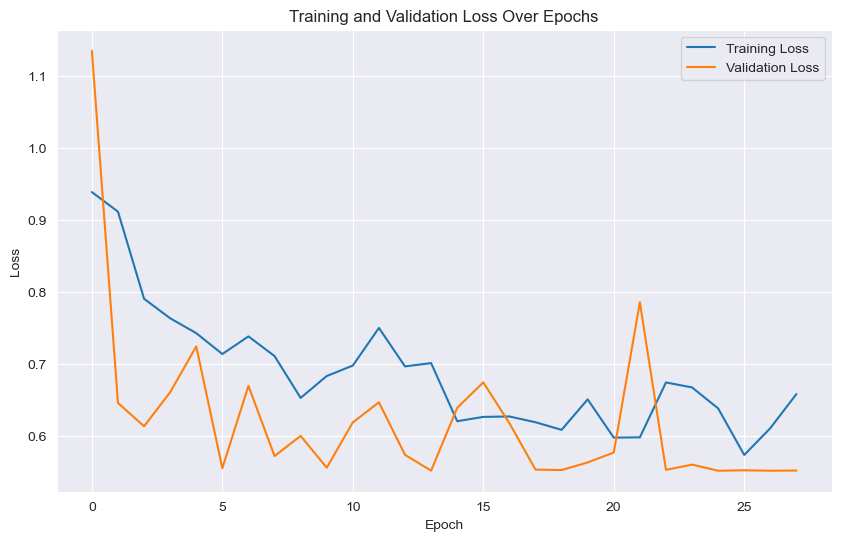

In [81]:
train_loss_res = [0.9388, 0.9116, 0.7905, 0.7634, 0.7427, 0.7137, 0.7382, 0.7109, 0.6527, 0.6831, 
                  0.6977, 0.7500, 0.6965, 0.7011, 0.6203, 0.6263, 0.6269, 0.6189, 0.6083, 0.6507, 
                  0.5975, 0.5979, 0.6742, 0.6673, 0.6381, 0.5734, 0.6107, 0.6581]
val_loss_res = [1.1353, 0.6457, 0.6133, 0.6606, 0.7243, 0.5551, 0.6695, 0.5719, 0.5999, 0.5557, 
                0.6187, 0.6466, 0.5736, 0.5516, 0.6389, 0.6743, 0.6176, 0.5531, 0.5524, 0.5630, 
                0.5768, 0.7856, 0.5527, 0.5600, 0.5515, 0.5521, 0.5515, 0.5518]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss_res, label='Training Loss')
plt.plot(val_loss_res, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Define ResNet-50 test model

## Start to test and show the result of result

In [70]:
def test_Res_model(device):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)
    """
    Function to test the model.

    Parameters:
    - device: Device for testing (CPU or GPU).
    - model_dir: Directory where the model file is located.
    - output_dir: Directory for test outputs.
    """

    model_path = 'F:\\Res\\best_model_epoch_19.pth'

    # Load the model
    model = torch.load(model_path)
    # Load the model to the specified device
    model.to(device)
    # Switch to evaluation mode
    model.eval()
    # Define binary cross-entropy loss
    criterion = nn.CrossEntropyLoss()
    # Initialize lists to store labels and predictions
    all_labels = []  # Ground truth labels
    all_preds = []   # Predicted values
    total_loss = 0.0
    # No gradient calculation
    with torch.no_grad():
        # Iterate over the test dataset loader
        for images, diagnosis_labels in test_loader:
            # Load images to the device
            images = images.to(device)
            # Load multi-class labels to the device
            diagnosis_labels = diagnosis_labels.to(device)
            # Store model output
            diagnosis_output = model(images)

            loss = criterion(diagnosis_output, diagnosis_labels)
            total_loss += loss.item()
            # Use argmax to select the index of the maximum probability as the predicted class
            # Set the maximum probability index to 1 and others to 0
            diagnosis_preds = (diagnosis_output == diagnosis_output.max(dim=1, keepdim=True)[0]).float()

            # Store ground truth labels
            all_labels.extend(diagnosis_labels.cpu().numpy())
            # Store predicted values
            all_preds.extend(diagnosis_preds.cpu().numpy())

            # Log prediction results for each batch
            for j in range(len(diagnosis_labels)):
                true_label = diagnosis_labels[j].cpu().numpy()
                pred_label = diagnosis_preds[j].cpu().numpy()
                print(f"Sample { BATCH_SIZE + j + 1}: True: {true_label}, Predicted: {pred_label}")

    # Reshape labels and predictions to 2D arrays according to the total number of classes
    all_labels = np.array(all_labels).reshape(-1, NUM_CLASSES)
    all_preds = np.array(all_preds).reshape(-1, NUM_CLASSES)

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)

    sensitivity = recall_score(all_labels, all_preds, average='macro', zero_division=0)  # Sensitivity is recall

    # Calculate metrics for each class
    class_names = ['MEL', 'NV', 'BENIGN']
    specificities = []  # List to store specificities for averaging
    
    for i, class_name in enumerate(class_names):
        # Get current class labels and predictions
        true_labels = all_labels[:, i]
        pred_labels = all_preds[:, i]
        
        # Calculate TP, TN, FP, FN
        TP = np.sum((true_labels == 1) & (pred_labels == 1))
        TN = np.sum((true_labels == 0) & (pred_labels == 0))
        FP = np.sum((true_labels == 0) & (pred_labels == 1))
        FN = np.sum((true_labels == 1) & (pred_labels == 0))
        
        # Calculate metrics
        sensitivity_i = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity_i = TN / (TN + FP) if (TN + FP) != 0 else 0
        accuracy_i = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
        
        specificities.append(specificity_i)
        
        print(f"\n{class_name}:")
        print(f"    Sensitivity: {sensitivity_i:.4f}")
        print(f"    Specificity: {specificity_i:.4f}")
        print(f"    Accuracy: {accuracy_i:.4f}")
    
    # Calculate average specificity
    specificity = np.mean(specificities)
    
    # Log overall information
    print(f"\nOverall Results:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Sensitivity: {sensitivity:.4f}")
    print(f"Test Specificity: {specificity:.4f}")

## Test Result of ResNet-50

In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_Res_model(device)

Sample 33: True: [1. 0. 0.], Predicted: [1. 0. 0.]
Sample 34: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 35: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 36: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 37: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 38: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 39: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 40: True: [1. 0. 0.], Predicted: [1. 0. 0.]
Sample 41: True: [1. 0. 0.], Predicted: [0. 0. 1.]
Sample 42: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 43: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 44: True: [0. 0. 1.], Predicted: [0. 0. 1.]
Sample 45: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 46: True: [1. 0. 0.], Predicted: [0. 1. 0.]
Sample 47: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 48: True: [1. 0. 0.], Predicted: [1. 0. 0.]
Sample 49: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 50: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 51: True: [0. 1. 0.], Predicted: [0. 1. 0.]
Sample 52: True: [0. 0. 1.], Pr

## Confusion Matrix of ResNet-50

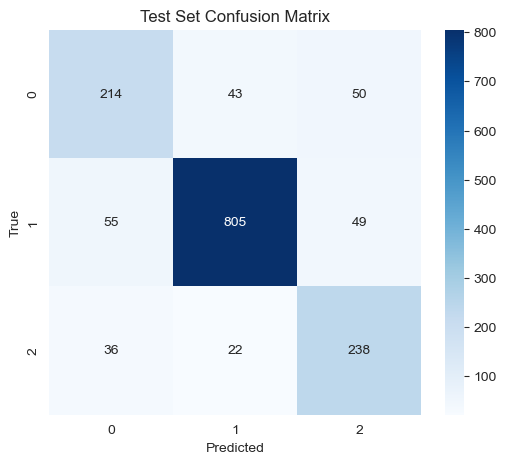

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

true_list = []
predicted_list = []

with open("resTruePredicted.txt") as data:

    for line in data:
        # Extracting True values and converting to a list
        true_values_str = line.split("True: ")[1].split(", Predicted:")[0].strip()
        true_values = [float(i) for i in true_values_str.replace('[', '').replace(']', '').split()]
        true_index = true_values.index(1.0) if 1.0 in true_values else None
        true_list.append(true_index)

        # Extracting Predicted values and converting to a list
        predicted_values_str = line.split("Predicted: ")[1].strip()
        predicted_values = [float(i) for i in predicted_values_str.replace('[', '').replace(']', '').split()]
        predicted_index = predicted_values.index(1.0) if 1.0 in predicted_values else None
        predicted_list.append(predicted_index)

cm = confusion_matrix(true_list, predicted_list)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Set Confusion Matrix')
plt.show()


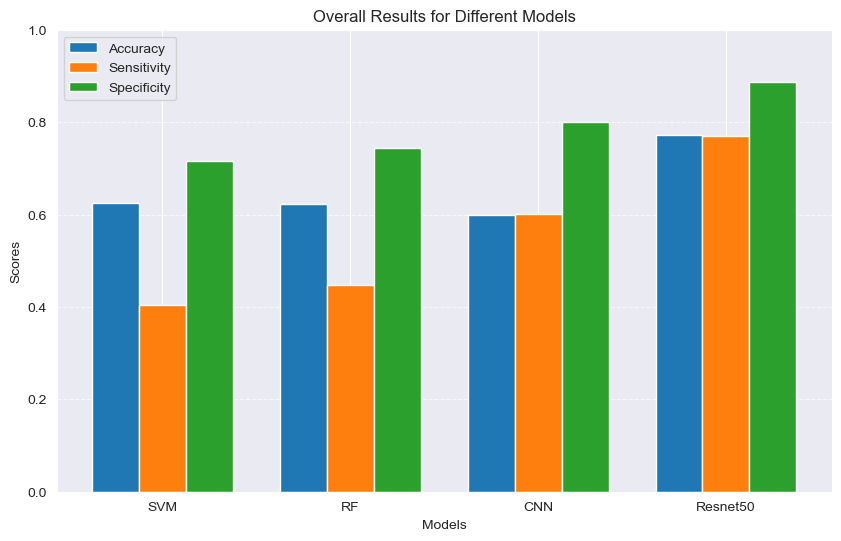

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["SVM", "RF", "CNN", "Resnet50"]
overall_accuracy = [0.6243, 0.6224, 0.5979, 0.7718]
overall_sensitivity = [0.4049, 0.4482, 0.6006, 0.7704]
overall_specificity = [0.7161, 0.7444, 0.7995, 0.8861]

# Plotting
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, overall_accuracy, width, label='Accuracy')
plt.bar(x, overall_sensitivity, width, label='Sensitivity')
plt.bar(x + width, overall_specificity, width, label='Specificity')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Overall Results for Different Models')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


![total_statical](https://objectstorage.ap-sydney-1.oraclecloud.com/n/sdgfztegun7d/b/bucket-20240909-1436/o/total_statical.png)

**Overall Accuracy (Test Accuracy):**

ResNet50 has the highest overall accuracy (0.7718), indicating its superior performance in the overall classification task, particularly compared to traditional machine learning models like SVM and RF. By contrast, SVM and RF have similar performance levels, while CNN is slightly less accurate.

**Overall Sensitivity (Test Sensitivity):**

ResNet50 also demonstrates the best performance in terms of overall sensitivity (0.7704), meaning it is better at detecting positive cases (i.e., lesions). Traditional machine learning models exhibit lower sensitivity, with SVM performing the worst (0.4049), and RF showing a slightly better sensitivity (0.4482). The sensitivity of CNN is better than that of SVM and RF but still does not surpass ResNet50.

**Overall Specificity (Test Specificity):**

ResNet50 also excels in overall specificity (0.8861), reflecting its strong ability to correctly identify negative samples (normal cases). SVM and RF have relatively lower specificity, while CNN shows slightly better specificity than SVM and RF but falls short compared to ResNet50.

**Performance Across Classes:**

For malignant lesions (MEL), ResNet50 has the highest sensitivity, indicating its superior ability to detect malignant cases. In contrast, SVM performs the worst in terms of sensitivity for the MEL.
For NV and BENIGN categories, ResNet50 also demonstrates outstanding performance, showing a clear advantage over CNN. SVM and RF show relatively average performance in these classes.

# Discussion

### Analysis of the Limitations of Traditional Machine Learning (SVM and Random Forest) and the Advantages of CNN

1. **Dependence on Handcrafted Features**
   - **Limitation**: Traditional machine learning models, like SVM and Random Forest, rely heavily on manually designed features for image processing tasks. Even well-designed features often fail to fully capture complex image information, particularly fine details.
   - **CNN Advantage**: CNNs use a multi-layered convolutional structure to automatically extract features, progressively capturing everything from edges and textures to more abstract image features. This ability removes the need for manual feature design and simplifies the preprocessing pipeline.

2. **Challenges in High-Dimensional Data and Nonlinear Modeling**
   - **Limitation**: SVM and Random Forest struggle with high-dimensional data, increasing computation requirements and complicating the processing of large image datasets. Additionally, these models are often limited in capturing complex nonlinear relationships, particularly in fitting intricate decision boundaries.
   - **CNN Advantage**: CNNs naturally handle high-dimensional image data and, through deep networks and nonlinear activation functions, enhance their ability to model complex nonlinear data. This makes CNNs particularly effective on large-scale image datasets.

3. **Sensitivity to Data Augmentation and Transformations**
   - **Limitation**: Traditional machine learning models are sensitive to variations in geometric and color transformations, such as rotation, scaling, and brightness changes. Such transformations often alter handcrafted features, impacting model performance.
   - **CNN Advantage**: CNNs have strong adaptability to these transformations and benefit significantly from data augmentation techniques (e.g., random flipping, rotating, scaling). During training, CNNs can learn different forms of transformations, leading to improved robustness to various real-world variations.

4. **Limited Expression of Spatial Structure in Images**
   - **Limitation**: Traditional models overlook the spatial structure in images, such as the relationships between neighboring pixels, making them less effective for tasks requiring spatial understanding (e.g., object recognition and image segmentation).
   - **CNN Advantage**: CNNs, through convolutional operations, retain spatial information, enabling them to better understand local structures and global patterns in images. This is especially advantageous for segmentation and detection tasks, as CNNs can identify the details and positional relationships necessary for tasks in fields like medical imaging and natural image processing.

In summary, CNNs demonstrate clear advantages in handling complex, high-dimensional, nonlinear data, and spatial structure learning in image tasks, making them superior to traditional machine learning models in applications such as image classification and segmentation.

## Analysis of CNN Limitations and ResNet-50 Advantages

### Disadvantages of CNNs

1. **Vanishing/Exploding Gradient Problem**:
   - Traditional CNNs suffer from vanishing or exploding gradients as the number of layers increases. This occurs because repeated convolutions and activations can cause gradients to shrink towards zero or grow uncontrollably, which hinders effective backpropagation, especially in deep architectures, and limits model performance.

2. **Difficulty in Learning Complex Representations**:
   - As CNNs deepen, it becomes increasingly challenging for them to learn complex, hierarchical representations, often leading to performance degradation instead of improvement. This phenomenon is known as the "degradation problem."

3. **Overfitting in Small Datasets**:
   - CNNs generally contain a large number of parameters, making them prone to overfitting, especially on small datasets. Without adequate regularization or data augmentation, these models may memorize the training data rather than generalize well to unseen data.

4. **Limited Depth and Layer Connectivity**:
   - Traditional CNNs are limited in how they connect layers. Each layer typically connects only to the previous one, restricting the model’s ability to retain information from earlier layers and preventing efficient gradient flow across the network.

### Advantages of ResNet-50

1. **Introduction of Residual Connections**:
   - ResNet-50 introduces residual (or skip) connections, allowing layers to learn residual mappings instead of direct mappings. This design mitigates the vanishing gradient problem by enabling gradients to flow more easily across layers, facilitating the training of very deep networks. Residual connections bypass intermediate layers, making it easier for the network to preserve learned features from previous layers.

2. **Better Generalization**:
   - Residual connections in ResNet-50 help the model learn more complex patterns without adding excessive layers that could lead to overfitting. This architecture effectively reduces model complexity, enhancing its robustness across a range of tasks and improving generalization.

3. **Increased Depth with Reduced Computational Cost**:
   - Despite being a deep network, ResNet-50 is optimized to avoid the computational and memory overhead associated with very deep traditional CNNs. The architecture includes bottleneck layers (1x1 convolutions) to reduce dimensionality before applying costly 3x3 convolutions, enabling the model to be both deep and computationally efficient.

4. **Improved Accuracy in Image Recognition**:
   - Due to its advanced architecture and depth, ResNet-50 achieves significantly better accuracy on complex tasks like image classification and object detection compared to traditional CNNs. This architecture won the ImageNet competition and remains popular in state-of-the-art models across multiple domains.

5. **Transfer Learning Capability**:
   - ResNet-50’s architecture is widely used for transfer learning, as its pre-trained weights on large datasets (e.g., ImageNet) provide a robust starting point for new tasks. These weights offer a rich set of low- to high-level feature representations that can be fine-tuned for specific applications with relatively little data.

In comparing the models used (SVM, RF, CNN, and ResNet50), it becomes clear that while traditional machine learning models (SVM and RF) offer reasonable performance, their limited capacity to capture complex features in high-dimensional data makes them less suited for our classification task. CNNs, though better at capturing spatial hierarchies in images, suffer from challenges such as vanishing gradients and limited generalization capabilities, particularly on complex data. ResNet50, on the other hand, excels in both learning complex representations and maintaining high generalization due to its innovative residual connections, making it the preferred model for our use case.

In summary, ResNet-50 addresses the limitations of traditional CNNs through residual connections, allowing for deeper architectures without performance degradation, efficient computation, and improved generalization, making it an ideal choice for complex image classification tasks.

## Final result of four different mdoels

| Metric             | SVM     | RF      | CNN     | ResNet-50 |
|--------------------|---------|---------|---------|-----------|
| Overall Accuracy   | 0.6243  | 0.6224  | 0.5979  | 0.7718    |
| Overall Sensitivity| 0.4049  | 0.4482  | 0.6006  | 0.7704    |
| Overall Specificity| 0.7161  | 0.7444  | 0.7995  | 0.8861    |

## Summary

### Strengths
1. **ResNet-50**:
   - Outperforms other methods, especially in overall accuracy (0.7718), sensitivity (0.7704), and specificity (0.8861). ResNet-50, as a deep convolutional neural network, can capture more complex and deep features from image data, improving classification precision.
   - Compared to traditional machine learning methods (SVM and RF), ResNet-50 better handles the nonlinearities and complexities of image data, making it suitable for tasks like skin disease classification that involve subtle differences.

2. **SVM and RF**:
   - SVM and RF perform well in specificity, with values of 0.7161 and 0.7444, respectively. This indicates that these methods have relatively lower false positive rates, excelling in identifying normal (non-disease) samples.
   - Both SVM and RF, as traditional machine learning methods, require less computational power compared to CNN and ResNet-50. Therefore, they are useful in resource-constrained environments.

### Weaknesses
1. **SVM and RF**:
   - Despite high specificity, both show low sensitivity, with SVM at 0.4049 and RF at 0.4482. This suggests that SVM and RF have lower detection rates for diseased samples, which could lead to missed diagnoses.
   - Relying on handcrafted features limits SVM and RF's effectiveness with image data. Unlike CNN and ResNet-50, they cannot automatically learn and extract deep features from images.

2. **CNN**:
   - While CNN has high specificity (0.7995), its sensitivity and overall accuracy do not surpass ResNet-50. This may be due to the shallower architecture of the CNN model, which cannot capture data complexities as effectively as the deeper ResNet-50 model.

### Limitations
- **Computational Cost of Deep Learning**: While ResNet-50 performs well, its training and inference demands are high, especially without GPU or TPU support, limiting its practical application.
- **Data Dependency**: The performance of both traditional and deep learning methods highly depends on data quality and sample balance. Further optimization or data augmentation might be necessary for imbalanced data.

### Future Work
1. **Enhanced Data Augmentation**: Experimenting with diverse data augmentation techniques can improve the model's generalization, particularly for minority classes.
2. **Model Ensemble**: Combining predictions from SVM, RF, CNN, and ResNet-50 through ensemble learning (e.g., weighted averaging, stacking) may further enhance accuracy and robustness.
3. **Transfer Learning and Fine-Tuning**: Fine-tuning the pre-trained ResNet-50 model to adapt it more closely to skin disease classification, or exploring architectures tailored for fine-grained classification, such as DenseNet or EfficientNet, may yield improvements.
4. **Deployment Optimization**: During deployment, exploring model compression and acceleration techniques, such as quantization or pruning, could increase ResNet-50’s feasibility in resource-limited environments.

In conclusion, ResNet-50 demonstrates the best performance for this task but may require further optimization and exploration of other methods depending on resource constraints and specific requirements.
